In [39]:
import numpy as np
import pandas as pd
from datetime import datetime
import math
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
import collections

In [2]:
bh = pd.read_csv('bh.dat', header = None, names = ['BlockID', 'hash','Block_time','n_txs'], delimiter= '\t', nrows = 100000)

In [3]:
bh['Block_time']= pd.to_datetime(bh['Block_time'], unit ='s')

In [4]:
bh.to_csv('bh.csv',index = False)


In [5]:
bh.head()

,BlockID,hash,Block_time,n_txs
0,0,000000000019d6689c085ae165831e934ff763ae46a2a6...,2009-01-03 18:15:05,1
1,1,00000000839a8e6886ab5951d76f411475428afc90947e...,2009-01-09 02:54:25,1
2,2,000000006a625f06636b8bb6ac7b960a8d03705d1ace08...,2009-01-09 02:55:44,1
3,3,0000000082b5015589a3fdf2d4baff403e6f0be035a5d9...,2009-01-09 03:02:53,1
4,4,000000004ebadb55ee9096c9a2f8880e09da59c0d68b1c...,2009-01-09 03:16:28,1


In [6]:
tx = pd.read_csv('tx.dat', header = None, names = ['txID', 'BlockID','n_inputs','n_outputs'], delimiter= '\t',nrows = 100000)

In [7]:
tx.to_csv('tx.csv',index = False)

In [8]:
tx.head()

,txID,BlockID,n_inputs,n_outputs
0,0,0,0,1
1,1,1,0,1
2,2,2,0,1
3,3,3,0,1
4,4,4,0,1


In [9]:
tx_in = pd.read_csv('txin.dat', header = None, names = ['txID', 'input_seq','prev_txID','prev_output_seq','addrID','txin_sum'], delimiter= '\t',nrows=100000)

In [10]:
tx_in.to_csv('tx_in.csv',index = False)

In [11]:
tx_in.head()

,txID,input_seq,prev_txID,prev_output_seq,addrID,txin_sum
0,171,0,9,0,9,5000000000
1,183,0,171,1,9,4000000000
2,185,0,183,1,9,3000000000
3,187,0,185,1,9,2900000000
4,192,0,187,0,187,100000000


In [12]:
tx_out = pd.read_csv('txout.dat', header = None, names = ['txID', 'output_seq','addrID','txout_sum'], delimiter= '\t',nrows=100000)

In [13]:
tx_out.to_csv('tx_out.csv',index = False)

In [14]:
tx_out.head()

,txID,output_seq,addrID,txout_sum
0,0,0,0,5000000000
1,1,0,1,5000000000
2,2,0,2,5000000000
3,3,0,3,5000000000
4,4,0,4,5000000000


In [15]:
address = pd.read_csv('addr_sccs.dat', header = None, names = ['addrID', 'userID'], delimiter= '\t',nrows=100000)

In [16]:
address.to_csv('addrs_user.csv',index = False)

In [17]:
address.head()

,addrID,userID
0,9990810,9990810
1,9999999,9990810
2,122943944,99999997
3,105361904,99999996
4,99990184,99990184


In [18]:
merge1_raw= pd.merge(tx, tx_in, on='txID', how='left')

In [19]:
merge1_raw

,txID,BlockID,n_inputs,n_outputs,input_seq,prev_txID,prev_output_seq,addrID,txin_sum
0,0,0,0,1,NaN,NaN,NaN,NaN,NaN
1,1,1,0,1,NaN,NaN,NaN,NaN,NaN
2,2,2,0,1,NaN,NaN,NaN,NaN,NaN
3,3,3,0,1,NaN,NaN,NaN,NaN,NaN
4,4,4,0,1,NaN,NaN,NaN,NaN,NaN
5,5,5,0,1,NaN,NaN,NaN,NaN,NaN
6,6,6,0,1,NaN,NaN,NaN,NaN,NaN
7,7,7,0,1,NaN,NaN,NaN,NaN,NaN
8,8,8,0,1,NaN,NaN,NaN,NaN,NaN
9,9,9,0,1,NaN,NaN,NaN,NaN,NaN


In [20]:
merge2_raw= pd.merge(merge1_raw, tx_out, on='txID',how='left')

In [21]:
merge2_raw

,txID,BlockID,n_inputs,n_outputs,input_seq,prev_txID,prev_output_seq,addrID_x,txin_sum,output_seq,addrID_y,txout_sum
0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,0.0,0.0,5.000000e+09
1,1,1,0,1,NaN,NaN,NaN,NaN,NaN,0.0,1.0,5.000000e+09
2,2,2,0,1,NaN,NaN,NaN,NaN,NaN,0.0,2.0,5.000000e+09
3,3,3,0,1,NaN,NaN,NaN,NaN,NaN,0.0,3.0,5.000000e+09
4,4,4,0,1,NaN,NaN,NaN,NaN,NaN,0.0,4.0,5.000000e+09
5,5,5,0,1,NaN,NaN,NaN,NaN,NaN,0.0,5.0,5.000000e+09
6,6,6,0,1,NaN,NaN,NaN,NaN,NaN,0.0,6.0,5.000000e+09
7,7,7,0,1,NaN,NaN,NaN,NaN,NaN,0.0,7.0,5.000000e+09
8,8,8,0,1,NaN,NaN,NaN,NaN,NaN,0.0,8.0,5.000000e+09
9,9,9,0,1,NaN,NaN,NaN,NaN,NaN,0.0,9.0,5.000000e+09


In [22]:
from sklearn.cluster import KMeans

In [23]:
dropped_df= merge2_raw.dropna()

In [24]:
dropped_df

,txID,BlockID,n_inputs,n_outputs,input_seq,prev_txID,prev_output_seq,addrID_x,txin_sum,output_seq,addrID_y,txout_sum
171,171,170,1,2,0.0,9.0,0.0,9.0,5.000000e+09,0.0,171.0,1.000000e+09
172,171,170,1,2,0.0,9.0,0.0,9.0,5.000000e+09,1.0,9.0,4.000000e+09
184,183,181,1,2,0.0,171.0,1.0,9.0,4.000000e+09,0.0,183.0,1.000000e+09
185,183,181,1,2,0.0,171.0,1.0,9.0,4.000000e+09,1.0,9.0,3.000000e+09
187,185,182,1,2,0.0,183.0,1.0,9.0,3.000000e+09,0.0,185.0,1.000000e+08
188,185,182,1,2,0.0,183.0,1.0,9.0,3.000000e+09,1.0,9.0,2.900000e+09
190,187,183,1,2,0.0,185.0,1.0,9.0,2.900000e+09,0.0,187.0,1.000000e+08
191,187,183,1,2,0.0,185.0,1.0,9.0,2.900000e+09,1.0,9.0,2.800000e+09
196,192,187,1,1,0.0,187.0,0.0,187.0,1.000000e+08,0.0,192.0,1.000000e+08
231,227,221,1,1,0.0,185.0,0.0,185.0,1.000000e+08,0.0,227.0,1.000000e+08


In [51]:
dropped_df.to_csv('data_last.csv',index = False)

In [25]:
kmeans = KMeans(n_clusters=8)

In [26]:
kmeans.fit(dropped_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
y_kmeans= kmeans.predict(dropped_df)

In [36]:
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

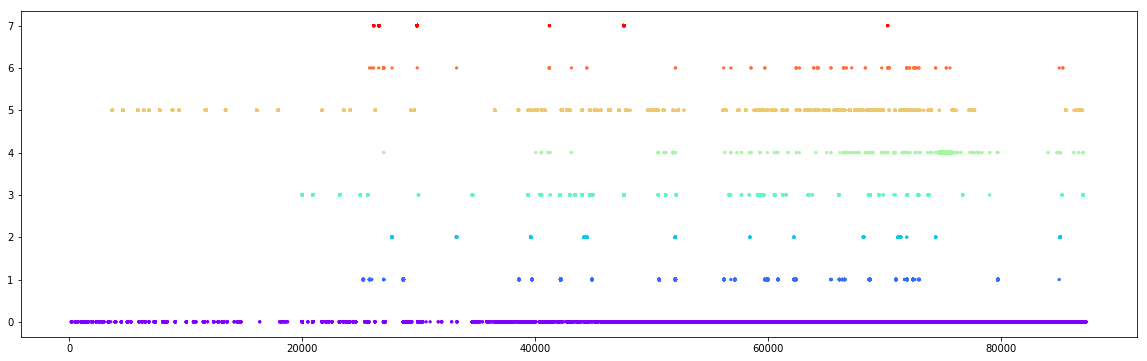

In [48]:
plt.figure(figsize=(20, 6))
plt.scatter(dropped_df['txID'], y_kmeans, c=y_kmeans, s=5, cmap='rainbow')

In [40]:
cluster_counter=collections.Counter(y_kmeans)

In [41]:
cluster_counter

Counter({0: 43049, 5: 5025, 3: 2415, 1: 3402, 6: 81, 7: 543, 4: 1370, 2: 2649})

In [42]:
cluster_counter.keys()

dict_keys([0, 5, 3, 1, 6, 7, 4, 2])

In [43]:
cluster_counter.values()

dict_values([43049, 5025, 2415, 3402, 81, 543, 1370, 2649])

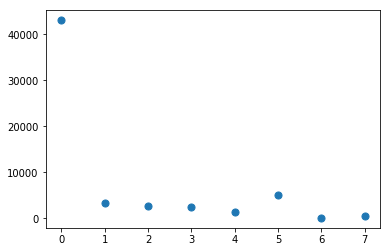

In [44]:
plt.scatter(cluster_counter.keys(), cluster_counter.values(), s=50, cmap='rainbow')

In [ ]:
df.plt.bar(x='lab', y='val', rot=0)

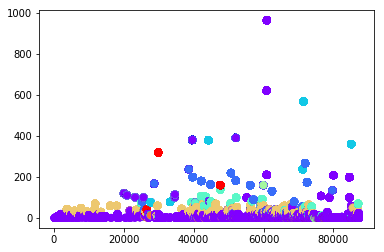

In [28]:
plt.scatter(dropped_df['txID'], dropped_df['n_inputs'], c=y_kmeans, s=50, cmap='rainbow')


In [49]:
def ClusterIndicesNumpy(clustNum, labels_array): 
    return np.where(labels_array == clustNum)[0]

In [50]:
ClusterIndicesNumpy(6, kmeans.labels_)

array([ 2446,  2474,  2481,  2570,  2574,  2575,  2616,  2617,  2618,
        2619,  2620,  2621,  2623,  2625,  2636,  2743,  3568,  3671,
        7028,  7029,  7045,  7046,  7053,  7811,  8591,  8592, 12208,
       13194, 20303, 20713, 21743, 21744, 22783, 22784, 26799, 26931,
       26932, 27177, 27937, 27938, 28068, 28069, 28205, 28206, 28911,
       28912, 29627, 29628, 29689, 29806, 30130, 31090, 31091, 32148,
       32438, 32444, 32445, 32501, 32502, 34504, 34505, 34509, 34782,
       34783, 34995, 34996, 35414, 35445, 35488, 35512, 35610, 35786,
       35787, 37084, 37085, 38454, 38455, 38840, 54872, 55818, 55819],
      dtype=int64)

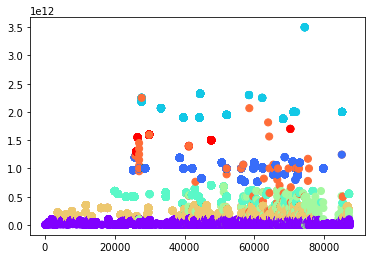

In [31]:
plt.scatter(dropped_df['txID'], dropped_df['txout_sum'],c=y_kmeans, s=50, cmap='rainbow')

In [32]:
ClusterIndicesNumpy(7, kmeans.labels_)

array([ 2475,  2476,  2477,  2478,  2479,  2480,  2482,  2483,  2484,
        2485,  2486,  2487,  2488,  2489,  2490,  2532,  2533,  2534,
        2535,  2536,  2537,  2538,  2539,  2540,  2541,  2542,  2543,
        2544,  2545,  2546,  2547,  2548,  2549,  2550,  2551,  2552,
        2553,  2554,  2555,  2556,  2557,  2558,  2559,  2560,  2561,
        2562,  2563,  2564,  2565,  2566,  2567,  2568,  2569,  2571,
        2572,  2573,  3248,  3249,  3250,  3251,  3252,  3253,  3254,
        3255,  3256,  3257,  3258,  3259,  3260,  3261,  3262,  3263,
        3264,  3265,  3266,  3267,  3268,  3269,  3270,  3271,  3272,
        3273,  3274,  3275,  3276,  3277,  3278,  3279,  3280,  3281,
        3282,  3283,  3284,  3285,  3286,  3287,  3288,  3289,  3290,
        3291,  3292,  3293,  3294,  3295,  3296,  3297,  3298,  3299,
        3300,  3301,  3302,  3303,  3304,  3305,  3306,  3307,  3308,
        3309,  3310,  3311,  3312,  3313,  3314,  3315,  3316,  3317,
        3318,  3319,

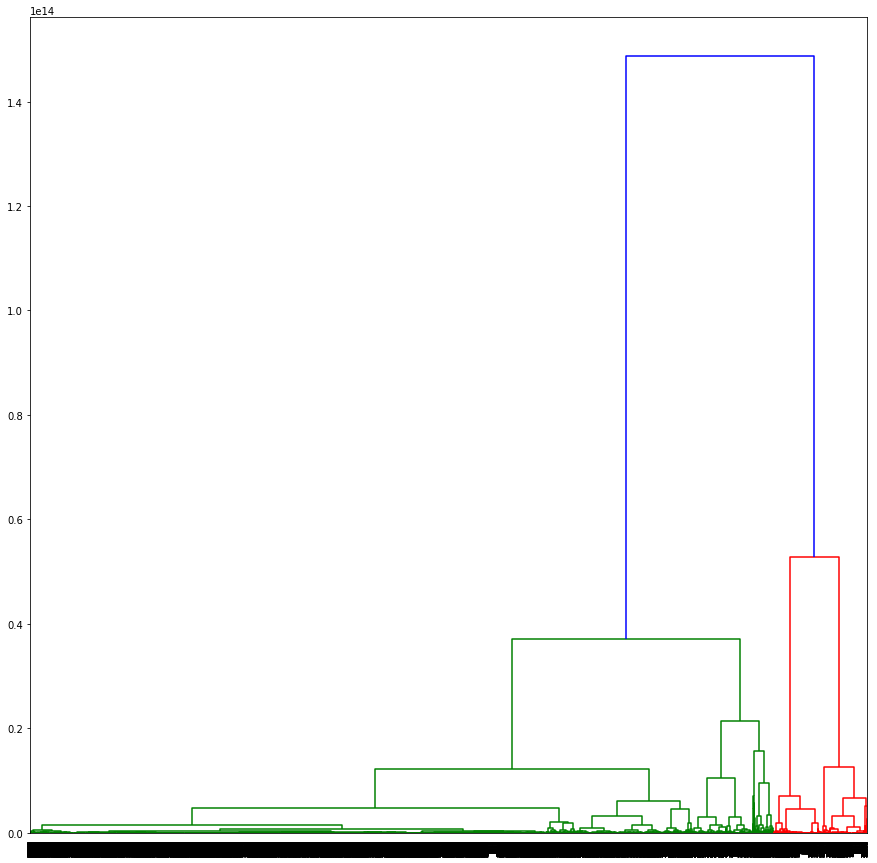

In [35]:
plt.figure(figsize=(15, 15))
dend = shc.dendrogram(shc.linkage(dropped_df, method='ward'))

In [33]:
rows_m= len(merge1.index)

In [34]:

rows_m

130410

In [20]:
row_list =[] 
  
for index, row in merge1_raw.iterrows():
    if math.isnan(row['addrID']):
        row_list.append(index)
        
print(row_list) 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 184, 186, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226,

In [21]:
merge1_raw.shape

(130410, 9)

In [22]:
x = merge1_raw.drop(0)

In [76]:
x = x.drop([3])

In [23]:
x

,txID,BlockID,n_inputs,n_outputs,input_seq,prev_txID,prev_output_seq,addrID,txin_sum
1,1,1,0,1,NaN,NaN,NaN,NaN,NaN
2,2,2,0,1,NaN,NaN,NaN,NaN,NaN
3,3,3,0,1,NaN,NaN,NaN,NaN,NaN
4,4,4,0,1,NaN,NaN,NaN,NaN,NaN
5,5,5,0,1,NaN,NaN,NaN,NaN,NaN
6,6,6,0,1,NaN,NaN,NaN,NaN,NaN
7,7,7,0,1,NaN,NaN,NaN,NaN,NaN
8,8,8,0,1,NaN,NaN,NaN,NaN,NaN
9,9,9,0,1,NaN,NaN,NaN,NaN,NaN
10,10,10,0,1,NaN,NaN,NaN,NaN,NaN


In [24]:
droped_df = merge1_raw

In [25]:
for idx in row_list:
    droped_df = droped_df.drop(idx)
    print(droped_df.shape)

(130409, 9)
(130408, 9)
(130407, 9)
(130406, 9)
(130405, 9)
(130404, 9)
(130403, 9)
(130402, 9)
(130401, 9)
(130400, 9)
(130399, 9)
(130398, 9)
(130397, 9)
(130396, 9)
(130395, 9)
(130394, 9)
(130393, 9)
(130392, 9)
(130391, 9)
(130390, 9)
(130389, 9)
(130388, 9)
(130387, 9)
(130386, 9)
(130385, 9)
(130384, 9)
(130383, 9)
(130382, 9)
(130381, 9)
(130380, 9)
(130379, 9)
(130378, 9)
(130377, 9)
(130376, 9)
(130375, 9)
(130374, 9)
(130373, 9)
(130372, 9)
(130371, 9)
(130370, 9)
(130369, 9)
(130368, 9)
(130367, 9)
(130366, 9)
(130365, 9)
(130364, 9)
(130363, 9)
(130362, 9)
(130361, 9)
(130360, 9)
(130359, 9)
(130358, 9)
(130357, 9)
(130356, 9)
(130355, 9)
(130354, 9)
(130353, 9)
(130352, 9)
(130351, 9)
(130350, 9)
(130349, 9)
(130348, 9)
(130347, 9)
(130346, 9)
(130345, 9)
(130344, 9)
(130343, 9)
(130342, 9)
(130341, 9)
(130340, 9)
(130339, 9)
(130338, 9)
(130337, 9)
(130336, 9)
(130335, 9)
(130334, 9)
(130333, 9)
(130332, 9)
(130331, 9)
(130330, 9)
(130329, 9)
(130328, 9)
(130327, 9)
(130

(129713, 9)
(129712, 9)
(129711, 9)
(129710, 9)
(129709, 9)
(129708, 9)
(129707, 9)
(129706, 9)
(129705, 9)
(129704, 9)
(129703, 9)
(129702, 9)
(129701, 9)
(129700, 9)
(129699, 9)
(129698, 9)
(129697, 9)
(129696, 9)
(129695, 9)
(129694, 9)
(129693, 9)
(129692, 9)
(129691, 9)
(129690, 9)
(129689, 9)
(129688, 9)
(129687, 9)
(129686, 9)
(129685, 9)
(129684, 9)
(129683, 9)
(129682, 9)
(129681, 9)
(129680, 9)
(129679, 9)
(129678, 9)
(129677, 9)
(129676, 9)
(129675, 9)
(129674, 9)
(129673, 9)
(129672, 9)
(129671, 9)
(129670, 9)
(129669, 9)
(129668, 9)
(129667, 9)
(129666, 9)
(129665, 9)
(129664, 9)
(129663, 9)
(129662, 9)
(129661, 9)
(129660, 9)
(129659, 9)
(129658, 9)
(129657, 9)
(129656, 9)
(129655, 9)
(129654, 9)
(129653, 9)
(129652, 9)
(129651, 9)
(129650, 9)
(129649, 9)
(129648, 9)
(129647, 9)
(129646, 9)
(129645, 9)
(129644, 9)
(129643, 9)
(129642, 9)
(129641, 9)
(129640, 9)
(129639, 9)
(129638, 9)
(129637, 9)
(129636, 9)
(129635, 9)
(129634, 9)
(129633, 9)
(129632, 9)
(129631, 9)
(129

(129024, 9)
(129023, 9)
(129022, 9)
(129021, 9)
(129020, 9)
(129019, 9)
(129018, 9)
(129017, 9)
(129016, 9)
(129015, 9)
(129014, 9)
(129013, 9)
(129012, 9)
(129011, 9)
(129010, 9)
(129009, 9)
(129008, 9)
(129007, 9)
(129006, 9)
(129005, 9)
(129004, 9)
(129003, 9)
(129002, 9)
(129001, 9)
(129000, 9)
(128999, 9)
(128998, 9)
(128997, 9)
(128996, 9)
(128995, 9)
(128994, 9)
(128993, 9)
(128992, 9)
(128991, 9)
(128990, 9)
(128989, 9)
(128988, 9)
(128987, 9)
(128986, 9)
(128985, 9)
(128984, 9)
(128983, 9)
(128982, 9)
(128981, 9)
(128980, 9)
(128979, 9)
(128978, 9)
(128977, 9)
(128976, 9)
(128975, 9)
(128974, 9)
(128973, 9)
(128972, 9)
(128971, 9)
(128970, 9)
(128969, 9)
(128968, 9)
(128967, 9)
(128966, 9)
(128965, 9)
(128964, 9)
(128963, 9)
(128962, 9)
(128961, 9)
(128960, 9)
(128959, 9)
(128958, 9)
(128957, 9)
(128956, 9)
(128955, 9)
(128954, 9)
(128953, 9)
(128952, 9)
(128951, 9)
(128950, 9)
(128949, 9)
(128948, 9)
(128947, 9)
(128946, 9)
(128945, 9)
(128944, 9)
(128943, 9)
(128942, 9)
(128

(128332, 9)
(128331, 9)
(128330, 9)
(128329, 9)
(128328, 9)
(128327, 9)
(128326, 9)
(128325, 9)
(128324, 9)
(128323, 9)
(128322, 9)
(128321, 9)
(128320, 9)
(128319, 9)
(128318, 9)
(128317, 9)
(128316, 9)
(128315, 9)
(128314, 9)
(128313, 9)
(128312, 9)
(128311, 9)
(128310, 9)
(128309, 9)
(128308, 9)
(128307, 9)
(128306, 9)
(128305, 9)
(128304, 9)
(128303, 9)
(128302, 9)
(128301, 9)
(128300, 9)
(128299, 9)
(128298, 9)
(128297, 9)
(128296, 9)
(128295, 9)
(128294, 9)
(128293, 9)
(128292, 9)
(128291, 9)
(128290, 9)
(128289, 9)
(128288, 9)
(128287, 9)
(128286, 9)
(128285, 9)
(128284, 9)
(128283, 9)
(128282, 9)
(128281, 9)
(128280, 9)
(128279, 9)
(128278, 9)
(128277, 9)
(128276, 9)
(128275, 9)
(128274, 9)
(128273, 9)
(128272, 9)
(128271, 9)
(128270, 9)
(128269, 9)
(128268, 9)
(128267, 9)
(128266, 9)
(128265, 9)
(128264, 9)
(128263, 9)
(128262, 9)
(128261, 9)
(128260, 9)
(128259, 9)
(128258, 9)
(128257, 9)
(128256, 9)
(128255, 9)
(128254, 9)
(128253, 9)
(128252, 9)
(128251, 9)
(128250, 9)
(128

(127641, 9)
(127640, 9)
(127639, 9)
(127638, 9)
(127637, 9)
(127636, 9)
(127635, 9)
(127634, 9)
(127633, 9)
(127632, 9)
(127631, 9)
(127630, 9)
(127629, 9)
(127628, 9)
(127627, 9)
(127626, 9)
(127625, 9)
(127624, 9)
(127623, 9)
(127622, 9)
(127621, 9)
(127620, 9)
(127619, 9)
(127618, 9)
(127617, 9)
(127616, 9)
(127615, 9)
(127614, 9)
(127613, 9)
(127612, 9)
(127611, 9)
(127610, 9)
(127609, 9)
(127608, 9)
(127607, 9)
(127606, 9)
(127605, 9)
(127604, 9)
(127603, 9)
(127602, 9)
(127601, 9)
(127600, 9)
(127599, 9)
(127598, 9)
(127597, 9)
(127596, 9)
(127595, 9)
(127594, 9)
(127593, 9)
(127592, 9)
(127591, 9)
(127590, 9)
(127589, 9)
(127588, 9)
(127587, 9)
(127586, 9)
(127585, 9)
(127584, 9)
(127583, 9)
(127582, 9)
(127581, 9)
(127580, 9)
(127579, 9)
(127578, 9)
(127577, 9)
(127576, 9)
(127575, 9)
(127574, 9)
(127573, 9)
(127572, 9)
(127571, 9)
(127570, 9)
(127569, 9)
(127568, 9)
(127567, 9)
(127566, 9)
(127565, 9)
(127564, 9)
(127563, 9)
(127562, 9)
(127561, 9)
(127560, 9)
(127559, 9)
(127

(126945, 9)
(126944, 9)
(126943, 9)
(126942, 9)
(126941, 9)
(126940, 9)
(126939, 9)
(126938, 9)
(126937, 9)
(126936, 9)
(126935, 9)
(126934, 9)
(126933, 9)
(126932, 9)
(126931, 9)
(126930, 9)
(126929, 9)
(126928, 9)
(126927, 9)
(126926, 9)
(126925, 9)
(126924, 9)
(126923, 9)
(126922, 9)
(126921, 9)
(126920, 9)
(126919, 9)
(126918, 9)
(126917, 9)
(126916, 9)
(126915, 9)
(126914, 9)
(126913, 9)
(126912, 9)
(126911, 9)
(126910, 9)
(126909, 9)
(126908, 9)
(126907, 9)
(126906, 9)
(126905, 9)
(126904, 9)
(126903, 9)
(126902, 9)
(126901, 9)
(126900, 9)
(126899, 9)
(126898, 9)
(126897, 9)
(126896, 9)
(126895, 9)
(126894, 9)
(126893, 9)
(126892, 9)
(126891, 9)
(126890, 9)
(126889, 9)
(126888, 9)
(126887, 9)
(126886, 9)
(126885, 9)
(126884, 9)
(126883, 9)
(126882, 9)
(126881, 9)
(126880, 9)
(126879, 9)
(126878, 9)
(126877, 9)
(126876, 9)
(126875, 9)
(126874, 9)
(126873, 9)
(126872, 9)
(126871, 9)
(126870, 9)
(126869, 9)
(126868, 9)
(126867, 9)
(126866, 9)
(126865, 9)
(126864, 9)
(126863, 9)
(126

(126258, 9)
(126257, 9)
(126256, 9)
(126255, 9)
(126254, 9)
(126253, 9)
(126252, 9)
(126251, 9)
(126250, 9)
(126249, 9)
(126248, 9)
(126247, 9)
(126246, 9)
(126245, 9)
(126244, 9)
(126243, 9)
(126242, 9)
(126241, 9)
(126240, 9)
(126239, 9)
(126238, 9)
(126237, 9)
(126236, 9)
(126235, 9)
(126234, 9)
(126233, 9)
(126232, 9)
(126231, 9)
(126230, 9)
(126229, 9)
(126228, 9)
(126227, 9)
(126226, 9)
(126225, 9)
(126224, 9)
(126223, 9)
(126222, 9)
(126221, 9)
(126220, 9)
(126219, 9)
(126218, 9)
(126217, 9)
(126216, 9)
(126215, 9)
(126214, 9)
(126213, 9)
(126212, 9)
(126211, 9)
(126210, 9)
(126209, 9)
(126208, 9)
(126207, 9)
(126206, 9)
(126205, 9)
(126204, 9)
(126203, 9)
(126202, 9)
(126201, 9)
(126200, 9)
(126199, 9)
(126198, 9)
(126197, 9)
(126196, 9)
(126195, 9)
(126194, 9)
(126193, 9)
(126192, 9)
(126191, 9)
(126190, 9)
(126189, 9)
(126188, 9)
(126187, 9)
(126186, 9)
(126185, 9)
(126184, 9)
(126183, 9)
(126182, 9)
(126181, 9)
(126180, 9)
(126179, 9)
(126178, 9)
(126177, 9)
(126176, 9)
(126

(125568, 9)
(125567, 9)
(125566, 9)
(125565, 9)
(125564, 9)
(125563, 9)
(125562, 9)
(125561, 9)
(125560, 9)
(125559, 9)
(125558, 9)
(125557, 9)
(125556, 9)
(125555, 9)
(125554, 9)
(125553, 9)
(125552, 9)
(125551, 9)
(125550, 9)
(125549, 9)
(125548, 9)
(125547, 9)
(125546, 9)
(125545, 9)
(125544, 9)
(125543, 9)
(125542, 9)
(125541, 9)
(125540, 9)
(125539, 9)
(125538, 9)
(125537, 9)
(125536, 9)
(125535, 9)
(125534, 9)
(125533, 9)
(125532, 9)
(125531, 9)
(125530, 9)
(125529, 9)
(125528, 9)
(125527, 9)
(125526, 9)
(125525, 9)
(125524, 9)
(125523, 9)
(125522, 9)
(125521, 9)
(125520, 9)
(125519, 9)
(125518, 9)
(125517, 9)
(125516, 9)
(125515, 9)
(125514, 9)
(125513, 9)
(125512, 9)
(125511, 9)
(125510, 9)
(125509, 9)
(125508, 9)
(125507, 9)
(125506, 9)
(125505, 9)
(125504, 9)
(125503, 9)
(125502, 9)
(125501, 9)
(125500, 9)
(125499, 9)
(125498, 9)
(125497, 9)
(125496, 9)
(125495, 9)
(125494, 9)
(125493, 9)
(125492, 9)
(125491, 9)
(125490, 9)
(125489, 9)
(125488, 9)
(125487, 9)
(125486, 9)
(125

(124878, 9)
(124877, 9)
(124876, 9)
(124875, 9)
(124874, 9)
(124873, 9)
(124872, 9)
(124871, 9)
(124870, 9)
(124869, 9)
(124868, 9)
(124867, 9)
(124866, 9)
(124865, 9)
(124864, 9)
(124863, 9)
(124862, 9)
(124861, 9)
(124860, 9)
(124859, 9)
(124858, 9)
(124857, 9)
(124856, 9)
(124855, 9)
(124854, 9)
(124853, 9)
(124852, 9)
(124851, 9)
(124850, 9)
(124849, 9)
(124848, 9)
(124847, 9)
(124846, 9)
(124845, 9)
(124844, 9)
(124843, 9)
(124842, 9)
(124841, 9)
(124840, 9)
(124839, 9)
(124838, 9)
(124837, 9)
(124836, 9)
(124835, 9)
(124834, 9)
(124833, 9)
(124832, 9)
(124831, 9)
(124830, 9)
(124829, 9)
(124828, 9)
(124827, 9)
(124826, 9)
(124825, 9)
(124824, 9)
(124823, 9)
(124822, 9)
(124821, 9)
(124820, 9)
(124819, 9)
(124818, 9)
(124817, 9)
(124816, 9)
(124815, 9)
(124814, 9)
(124813, 9)
(124812, 9)
(124811, 9)
(124810, 9)
(124809, 9)
(124808, 9)
(124807, 9)
(124806, 9)
(124805, 9)
(124804, 9)
(124803, 9)
(124802, 9)
(124801, 9)
(124800, 9)
(124799, 9)
(124798, 9)
(124797, 9)
(124796, 9)
(124

(124192, 9)
(124191, 9)
(124190, 9)
(124189, 9)
(124188, 9)
(124187, 9)
(124186, 9)
(124185, 9)
(124184, 9)
(124183, 9)
(124182, 9)
(124181, 9)
(124180, 9)
(124179, 9)
(124178, 9)
(124177, 9)
(124176, 9)
(124175, 9)
(124174, 9)
(124173, 9)
(124172, 9)
(124171, 9)
(124170, 9)
(124169, 9)
(124168, 9)
(124167, 9)
(124166, 9)
(124165, 9)
(124164, 9)
(124163, 9)
(124162, 9)
(124161, 9)
(124160, 9)
(124159, 9)
(124158, 9)
(124157, 9)
(124156, 9)
(124155, 9)
(124154, 9)
(124153, 9)
(124152, 9)
(124151, 9)
(124150, 9)
(124149, 9)
(124148, 9)
(124147, 9)
(124146, 9)
(124145, 9)
(124144, 9)
(124143, 9)
(124142, 9)
(124141, 9)
(124140, 9)
(124139, 9)
(124138, 9)
(124137, 9)
(124136, 9)
(124135, 9)
(124134, 9)
(124133, 9)
(124132, 9)
(124131, 9)
(124130, 9)
(124129, 9)
(124128, 9)
(124127, 9)
(124126, 9)
(124125, 9)
(124124, 9)
(124123, 9)
(124122, 9)
(124121, 9)
(124120, 9)
(124119, 9)
(124118, 9)
(124117, 9)
(124116, 9)
(124115, 9)
(124114, 9)
(124113, 9)
(124112, 9)
(124111, 9)
(124110, 9)
(124

(123508, 9)
(123507, 9)
(123506, 9)
(123505, 9)
(123504, 9)
(123503, 9)
(123502, 9)
(123501, 9)
(123500, 9)
(123499, 9)
(123498, 9)
(123497, 9)
(123496, 9)
(123495, 9)
(123494, 9)
(123493, 9)
(123492, 9)
(123491, 9)
(123490, 9)
(123489, 9)
(123488, 9)
(123487, 9)
(123486, 9)
(123485, 9)
(123484, 9)
(123483, 9)
(123482, 9)
(123481, 9)
(123480, 9)
(123479, 9)
(123478, 9)
(123477, 9)
(123476, 9)
(123475, 9)
(123474, 9)
(123473, 9)
(123472, 9)
(123471, 9)
(123470, 9)
(123469, 9)
(123468, 9)
(123467, 9)
(123466, 9)
(123465, 9)
(123464, 9)
(123463, 9)
(123462, 9)
(123461, 9)
(123460, 9)
(123459, 9)
(123458, 9)
(123457, 9)
(123456, 9)
(123455, 9)
(123454, 9)
(123453, 9)
(123452, 9)
(123451, 9)
(123450, 9)
(123449, 9)
(123448, 9)
(123447, 9)
(123446, 9)
(123445, 9)
(123444, 9)
(123443, 9)
(123442, 9)
(123441, 9)
(123440, 9)
(123439, 9)
(123438, 9)
(123437, 9)
(123436, 9)
(123435, 9)
(123434, 9)
(123433, 9)
(123432, 9)
(123431, 9)
(123430, 9)
(123429, 9)
(123428, 9)
(123427, 9)
(123426, 9)
(123

(122817, 9)
(122816, 9)
(122815, 9)
(122814, 9)
(122813, 9)
(122812, 9)
(122811, 9)
(122810, 9)
(122809, 9)
(122808, 9)
(122807, 9)
(122806, 9)
(122805, 9)
(122804, 9)
(122803, 9)
(122802, 9)
(122801, 9)
(122800, 9)
(122799, 9)
(122798, 9)
(122797, 9)
(122796, 9)
(122795, 9)
(122794, 9)
(122793, 9)
(122792, 9)
(122791, 9)
(122790, 9)
(122789, 9)
(122788, 9)
(122787, 9)
(122786, 9)
(122785, 9)
(122784, 9)
(122783, 9)
(122782, 9)
(122781, 9)
(122780, 9)
(122779, 9)
(122778, 9)
(122777, 9)
(122776, 9)
(122775, 9)
(122774, 9)
(122773, 9)
(122772, 9)
(122771, 9)
(122770, 9)
(122769, 9)
(122768, 9)
(122767, 9)
(122766, 9)
(122765, 9)
(122764, 9)
(122763, 9)
(122762, 9)
(122761, 9)
(122760, 9)
(122759, 9)
(122758, 9)
(122757, 9)
(122756, 9)
(122755, 9)
(122754, 9)
(122753, 9)
(122752, 9)
(122751, 9)
(122750, 9)
(122749, 9)
(122748, 9)
(122747, 9)
(122746, 9)
(122745, 9)
(122744, 9)
(122743, 9)
(122742, 9)
(122741, 9)
(122740, 9)
(122739, 9)
(122738, 9)
(122737, 9)
(122736, 9)
(122735, 9)
(122

(122130, 9)
(122129, 9)
(122128, 9)
(122127, 9)
(122126, 9)
(122125, 9)
(122124, 9)
(122123, 9)
(122122, 9)
(122121, 9)
(122120, 9)
(122119, 9)
(122118, 9)
(122117, 9)
(122116, 9)
(122115, 9)
(122114, 9)
(122113, 9)
(122112, 9)
(122111, 9)
(122110, 9)
(122109, 9)
(122108, 9)
(122107, 9)
(122106, 9)
(122105, 9)
(122104, 9)
(122103, 9)
(122102, 9)
(122101, 9)
(122100, 9)
(122099, 9)
(122098, 9)
(122097, 9)
(122096, 9)
(122095, 9)
(122094, 9)
(122093, 9)
(122092, 9)
(122091, 9)
(122090, 9)
(122089, 9)
(122088, 9)
(122087, 9)
(122086, 9)
(122085, 9)
(122084, 9)
(122083, 9)
(122082, 9)
(122081, 9)
(122080, 9)
(122079, 9)
(122078, 9)
(122077, 9)
(122076, 9)
(122075, 9)
(122074, 9)
(122073, 9)
(122072, 9)
(122071, 9)
(122070, 9)
(122069, 9)
(122068, 9)
(122067, 9)
(122066, 9)
(122065, 9)
(122064, 9)
(122063, 9)
(122062, 9)
(122061, 9)
(122060, 9)
(122059, 9)
(122058, 9)
(122057, 9)
(122056, 9)
(122055, 9)
(122054, 9)
(122053, 9)
(122052, 9)
(122051, 9)
(122050, 9)
(122049, 9)
(122048, 9)
(122

(121432, 9)
(121431, 9)
(121430, 9)
(121429, 9)
(121428, 9)
(121427, 9)
(121426, 9)
(121425, 9)
(121424, 9)
(121423, 9)
(121422, 9)
(121421, 9)
(121420, 9)
(121419, 9)
(121418, 9)
(121417, 9)
(121416, 9)
(121415, 9)
(121414, 9)
(121413, 9)
(121412, 9)
(121411, 9)
(121410, 9)
(121409, 9)
(121408, 9)
(121407, 9)
(121406, 9)
(121405, 9)
(121404, 9)
(121403, 9)
(121402, 9)
(121401, 9)
(121400, 9)
(121399, 9)
(121398, 9)
(121397, 9)
(121396, 9)
(121395, 9)
(121394, 9)
(121393, 9)
(121392, 9)
(121391, 9)
(121390, 9)
(121389, 9)
(121388, 9)
(121387, 9)
(121386, 9)
(121385, 9)
(121384, 9)
(121383, 9)
(121382, 9)
(121381, 9)
(121380, 9)
(121379, 9)
(121378, 9)
(121377, 9)
(121376, 9)
(121375, 9)
(121374, 9)
(121373, 9)
(121372, 9)
(121371, 9)
(121370, 9)
(121369, 9)
(121368, 9)
(121367, 9)
(121366, 9)
(121365, 9)
(121364, 9)
(121363, 9)
(121362, 9)
(121361, 9)
(121360, 9)
(121359, 9)
(121358, 9)
(121357, 9)
(121356, 9)
(121355, 9)
(121354, 9)
(121353, 9)
(121352, 9)
(121351, 9)
(121350, 9)
(121

(120745, 9)
(120744, 9)
(120743, 9)
(120742, 9)
(120741, 9)
(120740, 9)
(120739, 9)
(120738, 9)
(120737, 9)
(120736, 9)
(120735, 9)
(120734, 9)
(120733, 9)
(120732, 9)
(120731, 9)
(120730, 9)
(120729, 9)
(120728, 9)
(120727, 9)
(120726, 9)
(120725, 9)
(120724, 9)
(120723, 9)
(120722, 9)
(120721, 9)
(120720, 9)
(120719, 9)
(120718, 9)
(120717, 9)
(120716, 9)
(120715, 9)
(120714, 9)
(120713, 9)
(120712, 9)
(120711, 9)
(120710, 9)
(120709, 9)
(120708, 9)
(120707, 9)
(120706, 9)
(120705, 9)
(120704, 9)
(120703, 9)
(120702, 9)
(120701, 9)
(120700, 9)
(120699, 9)
(120698, 9)
(120697, 9)
(120696, 9)
(120695, 9)
(120694, 9)
(120693, 9)
(120692, 9)
(120691, 9)
(120690, 9)
(120689, 9)
(120688, 9)
(120687, 9)
(120686, 9)
(120685, 9)
(120684, 9)
(120683, 9)
(120682, 9)
(120681, 9)
(120680, 9)
(120679, 9)
(120678, 9)
(120677, 9)
(120676, 9)
(120675, 9)
(120674, 9)
(120673, 9)
(120672, 9)
(120671, 9)
(120670, 9)
(120669, 9)
(120668, 9)
(120667, 9)
(120666, 9)
(120665, 9)
(120664, 9)
(120663, 9)
(120

(120057, 9)
(120056, 9)
(120055, 9)
(120054, 9)
(120053, 9)
(120052, 9)
(120051, 9)
(120050, 9)
(120049, 9)
(120048, 9)
(120047, 9)
(120046, 9)
(120045, 9)
(120044, 9)
(120043, 9)
(120042, 9)
(120041, 9)
(120040, 9)
(120039, 9)
(120038, 9)
(120037, 9)
(120036, 9)
(120035, 9)
(120034, 9)
(120033, 9)
(120032, 9)
(120031, 9)
(120030, 9)
(120029, 9)
(120028, 9)
(120027, 9)
(120026, 9)
(120025, 9)
(120024, 9)
(120023, 9)
(120022, 9)
(120021, 9)
(120020, 9)
(120019, 9)
(120018, 9)
(120017, 9)
(120016, 9)
(120015, 9)
(120014, 9)
(120013, 9)
(120012, 9)
(120011, 9)
(120010, 9)
(120009, 9)
(120008, 9)
(120007, 9)
(120006, 9)
(120005, 9)
(120004, 9)
(120003, 9)
(120002, 9)
(120001, 9)
(120000, 9)
(119999, 9)
(119998, 9)
(119997, 9)
(119996, 9)
(119995, 9)
(119994, 9)
(119993, 9)
(119992, 9)
(119991, 9)
(119990, 9)
(119989, 9)
(119988, 9)
(119987, 9)
(119986, 9)
(119985, 9)
(119984, 9)
(119983, 9)
(119982, 9)
(119981, 9)
(119980, 9)
(119979, 9)
(119978, 9)
(119977, 9)
(119976, 9)
(119975, 9)
(119

(119361, 9)
(119360, 9)
(119359, 9)
(119358, 9)
(119357, 9)
(119356, 9)
(119355, 9)
(119354, 9)
(119353, 9)
(119352, 9)
(119351, 9)
(119350, 9)
(119349, 9)
(119348, 9)
(119347, 9)
(119346, 9)
(119345, 9)
(119344, 9)
(119343, 9)
(119342, 9)
(119341, 9)
(119340, 9)
(119339, 9)
(119338, 9)
(119337, 9)
(119336, 9)
(119335, 9)
(119334, 9)
(119333, 9)
(119332, 9)
(119331, 9)
(119330, 9)
(119329, 9)
(119328, 9)
(119327, 9)
(119326, 9)
(119325, 9)
(119324, 9)
(119323, 9)
(119322, 9)
(119321, 9)
(119320, 9)
(119319, 9)
(119318, 9)
(119317, 9)
(119316, 9)
(119315, 9)
(119314, 9)
(119313, 9)
(119312, 9)
(119311, 9)
(119310, 9)
(119309, 9)
(119308, 9)
(119307, 9)
(119306, 9)
(119305, 9)
(119304, 9)
(119303, 9)
(119302, 9)
(119301, 9)
(119300, 9)
(119299, 9)
(119298, 9)
(119297, 9)
(119296, 9)
(119295, 9)
(119294, 9)
(119293, 9)
(119292, 9)
(119291, 9)
(119290, 9)
(119289, 9)
(119288, 9)
(119287, 9)
(119286, 9)
(119285, 9)
(119284, 9)
(119283, 9)
(119282, 9)
(119281, 9)
(119280, 9)
(119279, 9)
(119

(118674, 9)
(118673, 9)
(118672, 9)
(118671, 9)
(118670, 9)
(118669, 9)
(118668, 9)
(118667, 9)
(118666, 9)
(118665, 9)
(118664, 9)
(118663, 9)
(118662, 9)
(118661, 9)
(118660, 9)
(118659, 9)
(118658, 9)
(118657, 9)
(118656, 9)
(118655, 9)
(118654, 9)
(118653, 9)
(118652, 9)
(118651, 9)
(118650, 9)
(118649, 9)
(118648, 9)
(118647, 9)
(118646, 9)
(118645, 9)
(118644, 9)
(118643, 9)
(118642, 9)
(118641, 9)
(118640, 9)
(118639, 9)
(118638, 9)
(118637, 9)
(118636, 9)
(118635, 9)
(118634, 9)
(118633, 9)
(118632, 9)
(118631, 9)
(118630, 9)
(118629, 9)
(118628, 9)
(118627, 9)
(118626, 9)
(118625, 9)
(118624, 9)
(118623, 9)
(118622, 9)
(118621, 9)
(118620, 9)
(118619, 9)
(118618, 9)
(118617, 9)
(118616, 9)
(118615, 9)
(118614, 9)
(118613, 9)
(118612, 9)
(118611, 9)
(118610, 9)
(118609, 9)
(118608, 9)
(118607, 9)
(118606, 9)
(118605, 9)
(118604, 9)
(118603, 9)
(118602, 9)
(118601, 9)
(118600, 9)
(118599, 9)
(118598, 9)
(118597, 9)
(118596, 9)
(118595, 9)
(118594, 9)
(118593, 9)
(118592, 9)
(118

(117990, 9)
(117989, 9)
(117988, 9)
(117987, 9)
(117986, 9)
(117985, 9)
(117984, 9)
(117983, 9)
(117982, 9)
(117981, 9)
(117980, 9)
(117979, 9)
(117978, 9)
(117977, 9)
(117976, 9)
(117975, 9)
(117974, 9)
(117973, 9)
(117972, 9)
(117971, 9)
(117970, 9)
(117969, 9)
(117968, 9)
(117967, 9)
(117966, 9)
(117965, 9)
(117964, 9)
(117963, 9)
(117962, 9)
(117961, 9)
(117960, 9)
(117959, 9)
(117958, 9)
(117957, 9)
(117956, 9)
(117955, 9)
(117954, 9)
(117953, 9)
(117952, 9)
(117951, 9)
(117950, 9)
(117949, 9)
(117948, 9)
(117947, 9)
(117946, 9)
(117945, 9)
(117944, 9)
(117943, 9)
(117942, 9)
(117941, 9)
(117940, 9)
(117939, 9)
(117938, 9)
(117937, 9)
(117936, 9)
(117935, 9)
(117934, 9)
(117933, 9)
(117932, 9)
(117931, 9)
(117930, 9)
(117929, 9)
(117928, 9)
(117927, 9)
(117926, 9)
(117925, 9)
(117924, 9)
(117923, 9)
(117922, 9)
(117921, 9)
(117920, 9)
(117919, 9)
(117918, 9)
(117917, 9)
(117916, 9)
(117915, 9)
(117914, 9)
(117913, 9)
(117912, 9)
(117911, 9)
(117910, 9)
(117909, 9)
(117908, 9)
(117

(117298, 9)
(117297, 9)
(117296, 9)
(117295, 9)
(117294, 9)
(117293, 9)
(117292, 9)
(117291, 9)
(117290, 9)
(117289, 9)
(117288, 9)
(117287, 9)
(117286, 9)
(117285, 9)
(117284, 9)
(117283, 9)
(117282, 9)
(117281, 9)
(117280, 9)
(117279, 9)
(117278, 9)
(117277, 9)
(117276, 9)
(117275, 9)
(117274, 9)
(117273, 9)
(117272, 9)
(117271, 9)
(117270, 9)
(117269, 9)
(117268, 9)
(117267, 9)
(117266, 9)
(117265, 9)
(117264, 9)
(117263, 9)
(117262, 9)
(117261, 9)
(117260, 9)
(117259, 9)
(117258, 9)
(117257, 9)
(117256, 9)
(117255, 9)
(117254, 9)
(117253, 9)
(117252, 9)
(117251, 9)
(117250, 9)
(117249, 9)
(117248, 9)
(117247, 9)
(117246, 9)
(117245, 9)
(117244, 9)
(117243, 9)
(117242, 9)
(117241, 9)
(117240, 9)
(117239, 9)
(117238, 9)
(117237, 9)
(117236, 9)
(117235, 9)
(117234, 9)
(117233, 9)
(117232, 9)
(117231, 9)
(117230, 9)
(117229, 9)
(117228, 9)
(117227, 9)
(117226, 9)
(117225, 9)
(117224, 9)
(117223, 9)
(117222, 9)
(117221, 9)
(117220, 9)
(117219, 9)
(117218, 9)
(117217, 9)
(117216, 9)
(117

(116603, 9)
(116602, 9)
(116601, 9)
(116600, 9)
(116599, 9)
(116598, 9)
(116597, 9)
(116596, 9)
(116595, 9)
(116594, 9)
(116593, 9)
(116592, 9)
(116591, 9)
(116590, 9)
(116589, 9)
(116588, 9)
(116587, 9)
(116586, 9)
(116585, 9)
(116584, 9)
(116583, 9)
(116582, 9)
(116581, 9)
(116580, 9)
(116579, 9)
(116578, 9)
(116577, 9)
(116576, 9)
(116575, 9)
(116574, 9)
(116573, 9)
(116572, 9)
(116571, 9)
(116570, 9)
(116569, 9)
(116568, 9)
(116567, 9)
(116566, 9)
(116565, 9)
(116564, 9)
(116563, 9)
(116562, 9)
(116561, 9)
(116560, 9)
(116559, 9)
(116558, 9)
(116557, 9)
(116556, 9)
(116555, 9)
(116554, 9)
(116553, 9)
(116552, 9)
(116551, 9)
(116550, 9)
(116549, 9)
(116548, 9)
(116547, 9)
(116546, 9)
(116545, 9)
(116544, 9)
(116543, 9)
(116542, 9)
(116541, 9)
(116540, 9)
(116539, 9)
(116538, 9)
(116537, 9)
(116536, 9)
(116535, 9)
(116534, 9)
(116533, 9)
(116532, 9)
(116531, 9)
(116530, 9)
(116529, 9)
(116528, 9)
(116527, 9)
(116526, 9)
(116525, 9)
(116524, 9)
(116523, 9)
(116522, 9)
(116521, 9)
(116

(115912, 9)
(115911, 9)
(115910, 9)
(115909, 9)
(115908, 9)
(115907, 9)
(115906, 9)
(115905, 9)
(115904, 9)
(115903, 9)
(115902, 9)
(115901, 9)
(115900, 9)
(115899, 9)
(115898, 9)
(115897, 9)
(115896, 9)
(115895, 9)
(115894, 9)
(115893, 9)
(115892, 9)
(115891, 9)
(115890, 9)
(115889, 9)
(115888, 9)
(115887, 9)
(115886, 9)
(115885, 9)
(115884, 9)
(115883, 9)
(115882, 9)
(115881, 9)
(115880, 9)
(115879, 9)
(115878, 9)
(115877, 9)
(115876, 9)
(115875, 9)
(115874, 9)
(115873, 9)
(115872, 9)
(115871, 9)
(115870, 9)
(115869, 9)
(115868, 9)
(115867, 9)
(115866, 9)
(115865, 9)
(115864, 9)
(115863, 9)
(115862, 9)
(115861, 9)
(115860, 9)
(115859, 9)
(115858, 9)
(115857, 9)
(115856, 9)
(115855, 9)
(115854, 9)
(115853, 9)
(115852, 9)
(115851, 9)
(115850, 9)
(115849, 9)
(115848, 9)
(115847, 9)
(115846, 9)
(115845, 9)
(115844, 9)
(115843, 9)
(115842, 9)
(115841, 9)
(115840, 9)
(115839, 9)
(115838, 9)
(115837, 9)
(115836, 9)
(115835, 9)
(115834, 9)
(115833, 9)
(115832, 9)
(115831, 9)
(115830, 9)
(115

(115212, 9)
(115211, 9)
(115210, 9)
(115209, 9)
(115208, 9)
(115207, 9)
(115206, 9)
(115205, 9)
(115204, 9)
(115203, 9)
(115202, 9)
(115201, 9)
(115200, 9)
(115199, 9)
(115198, 9)
(115197, 9)
(115196, 9)
(115195, 9)
(115194, 9)
(115193, 9)
(115192, 9)
(115191, 9)
(115190, 9)
(115189, 9)
(115188, 9)
(115187, 9)
(115186, 9)
(115185, 9)
(115184, 9)
(115183, 9)
(115182, 9)
(115181, 9)
(115180, 9)
(115179, 9)
(115178, 9)
(115177, 9)
(115176, 9)
(115175, 9)
(115174, 9)
(115173, 9)
(115172, 9)
(115171, 9)
(115170, 9)
(115169, 9)
(115168, 9)
(115167, 9)
(115166, 9)
(115165, 9)
(115164, 9)
(115163, 9)
(115162, 9)
(115161, 9)
(115160, 9)
(115159, 9)
(115158, 9)
(115157, 9)
(115156, 9)
(115155, 9)
(115154, 9)
(115153, 9)
(115152, 9)
(115151, 9)
(115150, 9)
(115149, 9)
(115148, 9)
(115147, 9)
(115146, 9)
(115145, 9)
(115144, 9)
(115143, 9)
(115142, 9)
(115141, 9)
(115140, 9)
(115139, 9)
(115138, 9)
(115137, 9)
(115136, 9)
(115135, 9)
(115134, 9)
(115133, 9)
(115132, 9)
(115131, 9)
(115130, 9)
(115

(114518, 9)
(114517, 9)
(114516, 9)
(114515, 9)
(114514, 9)
(114513, 9)
(114512, 9)
(114511, 9)
(114510, 9)
(114509, 9)
(114508, 9)
(114507, 9)
(114506, 9)
(114505, 9)
(114504, 9)
(114503, 9)
(114502, 9)
(114501, 9)
(114500, 9)
(114499, 9)
(114498, 9)
(114497, 9)
(114496, 9)
(114495, 9)
(114494, 9)
(114493, 9)
(114492, 9)
(114491, 9)
(114490, 9)
(114489, 9)
(114488, 9)
(114487, 9)
(114486, 9)
(114485, 9)
(114484, 9)
(114483, 9)
(114482, 9)
(114481, 9)
(114480, 9)
(114479, 9)
(114478, 9)
(114477, 9)
(114476, 9)
(114475, 9)
(114474, 9)
(114473, 9)
(114472, 9)
(114471, 9)
(114470, 9)
(114469, 9)
(114468, 9)
(114467, 9)
(114466, 9)
(114465, 9)
(114464, 9)
(114463, 9)
(114462, 9)
(114461, 9)
(114460, 9)
(114459, 9)
(114458, 9)
(114457, 9)
(114456, 9)
(114455, 9)
(114454, 9)
(114453, 9)
(114452, 9)
(114451, 9)
(114450, 9)
(114449, 9)
(114448, 9)
(114447, 9)
(114446, 9)
(114445, 9)
(114444, 9)
(114443, 9)
(114442, 9)
(114441, 9)
(114440, 9)
(114439, 9)
(114438, 9)
(114437, 9)
(114436, 9)
(114

(113821, 9)
(113820, 9)
(113819, 9)
(113818, 9)
(113817, 9)
(113816, 9)
(113815, 9)
(113814, 9)
(113813, 9)
(113812, 9)
(113811, 9)
(113810, 9)
(113809, 9)
(113808, 9)
(113807, 9)
(113806, 9)
(113805, 9)
(113804, 9)
(113803, 9)
(113802, 9)
(113801, 9)
(113800, 9)
(113799, 9)
(113798, 9)
(113797, 9)
(113796, 9)
(113795, 9)
(113794, 9)
(113793, 9)
(113792, 9)
(113791, 9)
(113790, 9)
(113789, 9)
(113788, 9)
(113787, 9)
(113786, 9)
(113785, 9)
(113784, 9)
(113783, 9)
(113782, 9)
(113781, 9)
(113780, 9)
(113779, 9)
(113778, 9)
(113777, 9)
(113776, 9)
(113775, 9)
(113774, 9)
(113773, 9)
(113772, 9)
(113771, 9)
(113770, 9)
(113769, 9)
(113768, 9)
(113767, 9)
(113766, 9)
(113765, 9)
(113764, 9)
(113763, 9)
(113762, 9)
(113761, 9)
(113760, 9)
(113759, 9)
(113758, 9)
(113757, 9)
(113756, 9)
(113755, 9)
(113754, 9)
(113753, 9)
(113752, 9)
(113751, 9)
(113750, 9)
(113749, 9)
(113748, 9)
(113747, 9)
(113746, 9)
(113745, 9)
(113744, 9)
(113743, 9)
(113742, 9)
(113741, 9)
(113740, 9)
(113739, 9)
(113

(113133, 9)
(113132, 9)
(113131, 9)
(113130, 9)
(113129, 9)
(113128, 9)
(113127, 9)
(113126, 9)
(113125, 9)
(113124, 9)
(113123, 9)
(113122, 9)
(113121, 9)
(113120, 9)
(113119, 9)
(113118, 9)
(113117, 9)
(113116, 9)
(113115, 9)
(113114, 9)
(113113, 9)
(113112, 9)
(113111, 9)
(113110, 9)
(113109, 9)
(113108, 9)
(113107, 9)
(113106, 9)
(113105, 9)
(113104, 9)
(113103, 9)
(113102, 9)
(113101, 9)
(113100, 9)
(113099, 9)
(113098, 9)
(113097, 9)
(113096, 9)
(113095, 9)
(113094, 9)
(113093, 9)
(113092, 9)
(113091, 9)
(113090, 9)
(113089, 9)
(113088, 9)
(113087, 9)
(113086, 9)
(113085, 9)
(113084, 9)
(113083, 9)
(113082, 9)
(113081, 9)
(113080, 9)
(113079, 9)
(113078, 9)
(113077, 9)
(113076, 9)
(113075, 9)
(113074, 9)
(113073, 9)
(113072, 9)
(113071, 9)
(113070, 9)
(113069, 9)
(113068, 9)
(113067, 9)
(113066, 9)
(113065, 9)
(113064, 9)
(113063, 9)
(113062, 9)
(113061, 9)
(113060, 9)
(113059, 9)
(113058, 9)
(113057, 9)
(113056, 9)
(113055, 9)
(113054, 9)
(113053, 9)
(113052, 9)
(113051, 9)
(113

(112435, 9)
(112434, 9)
(112433, 9)
(112432, 9)
(112431, 9)
(112430, 9)
(112429, 9)
(112428, 9)
(112427, 9)
(112426, 9)
(112425, 9)
(112424, 9)
(112423, 9)
(112422, 9)
(112421, 9)
(112420, 9)
(112419, 9)
(112418, 9)
(112417, 9)
(112416, 9)
(112415, 9)
(112414, 9)
(112413, 9)
(112412, 9)
(112411, 9)
(112410, 9)
(112409, 9)
(112408, 9)
(112407, 9)
(112406, 9)
(112405, 9)
(112404, 9)
(112403, 9)
(112402, 9)
(112401, 9)
(112400, 9)
(112399, 9)
(112398, 9)
(112397, 9)
(112396, 9)
(112395, 9)
(112394, 9)
(112393, 9)
(112392, 9)
(112391, 9)
(112390, 9)
(112389, 9)
(112388, 9)
(112387, 9)
(112386, 9)
(112385, 9)
(112384, 9)
(112383, 9)
(112382, 9)
(112381, 9)
(112380, 9)
(112379, 9)
(112378, 9)
(112377, 9)
(112376, 9)
(112375, 9)
(112374, 9)
(112373, 9)
(112372, 9)
(112371, 9)
(112370, 9)
(112369, 9)
(112368, 9)
(112367, 9)
(112366, 9)
(112365, 9)
(112364, 9)
(112363, 9)
(112362, 9)
(112361, 9)
(112360, 9)
(112359, 9)
(112358, 9)
(112357, 9)
(112356, 9)
(112355, 9)
(112354, 9)
(112353, 9)
(112

(111745, 9)
(111744, 9)
(111743, 9)
(111742, 9)
(111741, 9)
(111740, 9)
(111739, 9)
(111738, 9)
(111737, 9)
(111736, 9)
(111735, 9)
(111734, 9)
(111733, 9)
(111732, 9)
(111731, 9)
(111730, 9)
(111729, 9)
(111728, 9)
(111727, 9)
(111726, 9)
(111725, 9)
(111724, 9)
(111723, 9)
(111722, 9)
(111721, 9)
(111720, 9)
(111719, 9)
(111718, 9)
(111717, 9)
(111716, 9)
(111715, 9)
(111714, 9)
(111713, 9)
(111712, 9)
(111711, 9)
(111710, 9)
(111709, 9)
(111708, 9)
(111707, 9)
(111706, 9)
(111705, 9)
(111704, 9)
(111703, 9)
(111702, 9)
(111701, 9)
(111700, 9)
(111699, 9)
(111698, 9)
(111697, 9)
(111696, 9)
(111695, 9)
(111694, 9)
(111693, 9)
(111692, 9)
(111691, 9)
(111690, 9)
(111689, 9)
(111688, 9)
(111687, 9)
(111686, 9)
(111685, 9)
(111684, 9)
(111683, 9)
(111682, 9)
(111681, 9)
(111680, 9)
(111679, 9)
(111678, 9)
(111677, 9)
(111676, 9)
(111675, 9)
(111674, 9)
(111673, 9)
(111672, 9)
(111671, 9)
(111670, 9)
(111669, 9)
(111668, 9)
(111667, 9)
(111666, 9)
(111665, 9)
(111664, 9)
(111663, 9)
(111

(111048, 9)
(111047, 9)
(111046, 9)
(111045, 9)
(111044, 9)
(111043, 9)
(111042, 9)
(111041, 9)
(111040, 9)
(111039, 9)
(111038, 9)
(111037, 9)
(111036, 9)
(111035, 9)
(111034, 9)
(111033, 9)
(111032, 9)
(111031, 9)
(111030, 9)
(111029, 9)
(111028, 9)
(111027, 9)
(111026, 9)
(111025, 9)
(111024, 9)
(111023, 9)
(111022, 9)
(111021, 9)
(111020, 9)
(111019, 9)
(111018, 9)
(111017, 9)
(111016, 9)
(111015, 9)
(111014, 9)
(111013, 9)
(111012, 9)
(111011, 9)
(111010, 9)
(111009, 9)
(111008, 9)
(111007, 9)
(111006, 9)
(111005, 9)
(111004, 9)
(111003, 9)
(111002, 9)
(111001, 9)
(111000, 9)
(110999, 9)
(110998, 9)
(110997, 9)
(110996, 9)
(110995, 9)
(110994, 9)
(110993, 9)
(110992, 9)
(110991, 9)
(110990, 9)
(110989, 9)
(110988, 9)
(110987, 9)
(110986, 9)
(110985, 9)
(110984, 9)
(110983, 9)
(110982, 9)
(110981, 9)
(110980, 9)
(110979, 9)
(110978, 9)
(110977, 9)
(110976, 9)
(110975, 9)
(110974, 9)
(110973, 9)
(110972, 9)
(110971, 9)
(110970, 9)
(110969, 9)
(110968, 9)
(110967, 9)
(110966, 9)
(110

(110350, 9)
(110349, 9)
(110348, 9)
(110347, 9)
(110346, 9)
(110345, 9)
(110344, 9)
(110343, 9)
(110342, 9)
(110341, 9)
(110340, 9)
(110339, 9)
(110338, 9)
(110337, 9)
(110336, 9)
(110335, 9)
(110334, 9)
(110333, 9)
(110332, 9)
(110331, 9)
(110330, 9)
(110329, 9)
(110328, 9)
(110327, 9)
(110326, 9)
(110325, 9)
(110324, 9)
(110323, 9)
(110322, 9)
(110321, 9)
(110320, 9)
(110319, 9)
(110318, 9)
(110317, 9)
(110316, 9)
(110315, 9)
(110314, 9)
(110313, 9)
(110312, 9)
(110311, 9)
(110310, 9)
(110309, 9)
(110308, 9)
(110307, 9)
(110306, 9)
(110305, 9)
(110304, 9)
(110303, 9)
(110302, 9)
(110301, 9)
(110300, 9)
(110299, 9)
(110298, 9)
(110297, 9)
(110296, 9)
(110295, 9)
(110294, 9)
(110293, 9)
(110292, 9)
(110291, 9)
(110290, 9)
(110289, 9)
(110288, 9)
(110287, 9)
(110286, 9)
(110285, 9)
(110284, 9)
(110283, 9)
(110282, 9)
(110281, 9)
(110280, 9)
(110279, 9)
(110278, 9)
(110277, 9)
(110276, 9)
(110275, 9)
(110274, 9)
(110273, 9)
(110272, 9)
(110271, 9)
(110270, 9)
(110269, 9)
(110268, 9)
(110

(109658, 9)
(109657, 9)
(109656, 9)
(109655, 9)
(109654, 9)
(109653, 9)
(109652, 9)
(109651, 9)
(109650, 9)
(109649, 9)
(109648, 9)
(109647, 9)
(109646, 9)
(109645, 9)
(109644, 9)
(109643, 9)
(109642, 9)
(109641, 9)
(109640, 9)
(109639, 9)
(109638, 9)
(109637, 9)
(109636, 9)
(109635, 9)
(109634, 9)
(109633, 9)
(109632, 9)
(109631, 9)
(109630, 9)
(109629, 9)
(109628, 9)
(109627, 9)
(109626, 9)
(109625, 9)
(109624, 9)
(109623, 9)
(109622, 9)
(109621, 9)
(109620, 9)
(109619, 9)
(109618, 9)
(109617, 9)
(109616, 9)
(109615, 9)
(109614, 9)
(109613, 9)
(109612, 9)
(109611, 9)
(109610, 9)
(109609, 9)
(109608, 9)
(109607, 9)
(109606, 9)
(109605, 9)
(109604, 9)
(109603, 9)
(109602, 9)
(109601, 9)
(109600, 9)
(109599, 9)
(109598, 9)
(109597, 9)
(109596, 9)
(109595, 9)
(109594, 9)
(109593, 9)
(109592, 9)
(109591, 9)
(109590, 9)
(109589, 9)
(109588, 9)
(109587, 9)
(109586, 9)
(109585, 9)
(109584, 9)
(109583, 9)
(109582, 9)
(109581, 9)
(109580, 9)
(109579, 9)
(109578, 9)
(109577, 9)
(109576, 9)
(109

(108966, 9)
(108965, 9)
(108964, 9)
(108963, 9)
(108962, 9)
(108961, 9)
(108960, 9)
(108959, 9)
(108958, 9)
(108957, 9)
(108956, 9)
(108955, 9)
(108954, 9)
(108953, 9)
(108952, 9)
(108951, 9)
(108950, 9)
(108949, 9)
(108948, 9)
(108947, 9)
(108946, 9)
(108945, 9)
(108944, 9)
(108943, 9)
(108942, 9)
(108941, 9)
(108940, 9)
(108939, 9)
(108938, 9)
(108937, 9)
(108936, 9)
(108935, 9)
(108934, 9)
(108933, 9)
(108932, 9)
(108931, 9)
(108930, 9)
(108929, 9)
(108928, 9)
(108927, 9)
(108926, 9)
(108925, 9)
(108924, 9)
(108923, 9)
(108922, 9)
(108921, 9)
(108920, 9)
(108919, 9)
(108918, 9)
(108917, 9)
(108916, 9)
(108915, 9)
(108914, 9)
(108913, 9)
(108912, 9)
(108911, 9)
(108910, 9)
(108909, 9)
(108908, 9)
(108907, 9)
(108906, 9)
(108905, 9)
(108904, 9)
(108903, 9)
(108902, 9)
(108901, 9)
(108900, 9)
(108899, 9)
(108898, 9)
(108897, 9)
(108896, 9)
(108895, 9)
(108894, 9)
(108893, 9)
(108892, 9)
(108891, 9)
(108890, 9)
(108889, 9)
(108888, 9)
(108887, 9)
(108886, 9)
(108885, 9)
(108884, 9)
(108

(108266, 9)
(108265, 9)
(108264, 9)
(108263, 9)
(108262, 9)
(108261, 9)
(108260, 9)
(108259, 9)
(108258, 9)
(108257, 9)
(108256, 9)
(108255, 9)
(108254, 9)
(108253, 9)
(108252, 9)
(108251, 9)
(108250, 9)
(108249, 9)
(108248, 9)
(108247, 9)
(108246, 9)
(108245, 9)
(108244, 9)
(108243, 9)
(108242, 9)
(108241, 9)
(108240, 9)
(108239, 9)
(108238, 9)
(108237, 9)
(108236, 9)
(108235, 9)
(108234, 9)
(108233, 9)
(108232, 9)
(108231, 9)
(108230, 9)
(108229, 9)
(108228, 9)
(108227, 9)
(108226, 9)
(108225, 9)
(108224, 9)
(108223, 9)
(108222, 9)
(108221, 9)
(108220, 9)
(108219, 9)
(108218, 9)
(108217, 9)
(108216, 9)
(108215, 9)
(108214, 9)
(108213, 9)
(108212, 9)
(108211, 9)
(108210, 9)
(108209, 9)
(108208, 9)
(108207, 9)
(108206, 9)
(108205, 9)
(108204, 9)
(108203, 9)
(108202, 9)
(108201, 9)
(108200, 9)
(108199, 9)
(108198, 9)
(108197, 9)
(108196, 9)
(108195, 9)
(108194, 9)
(108193, 9)
(108192, 9)
(108191, 9)
(108190, 9)
(108189, 9)
(108188, 9)
(108187, 9)
(108186, 9)
(108185, 9)
(108184, 9)
(108

(107573, 9)
(107572, 9)
(107571, 9)
(107570, 9)
(107569, 9)
(107568, 9)
(107567, 9)
(107566, 9)
(107565, 9)
(107564, 9)
(107563, 9)
(107562, 9)
(107561, 9)
(107560, 9)
(107559, 9)
(107558, 9)
(107557, 9)
(107556, 9)
(107555, 9)
(107554, 9)
(107553, 9)
(107552, 9)
(107551, 9)
(107550, 9)
(107549, 9)
(107548, 9)
(107547, 9)
(107546, 9)
(107545, 9)
(107544, 9)
(107543, 9)
(107542, 9)
(107541, 9)
(107540, 9)
(107539, 9)
(107538, 9)
(107537, 9)
(107536, 9)
(107535, 9)
(107534, 9)
(107533, 9)
(107532, 9)
(107531, 9)
(107530, 9)
(107529, 9)
(107528, 9)
(107527, 9)
(107526, 9)
(107525, 9)
(107524, 9)
(107523, 9)
(107522, 9)
(107521, 9)
(107520, 9)
(107519, 9)
(107518, 9)
(107517, 9)
(107516, 9)
(107515, 9)
(107514, 9)
(107513, 9)
(107512, 9)
(107511, 9)
(107510, 9)
(107509, 9)
(107508, 9)
(107507, 9)
(107506, 9)
(107505, 9)
(107504, 9)
(107503, 9)
(107502, 9)
(107501, 9)
(107500, 9)
(107499, 9)
(107498, 9)
(107497, 9)
(107496, 9)
(107495, 9)
(107494, 9)
(107493, 9)
(107492, 9)
(107491, 9)
(107

(106881, 9)
(106880, 9)
(106879, 9)
(106878, 9)
(106877, 9)
(106876, 9)
(106875, 9)
(106874, 9)
(106873, 9)
(106872, 9)
(106871, 9)
(106870, 9)
(106869, 9)
(106868, 9)
(106867, 9)
(106866, 9)
(106865, 9)
(106864, 9)
(106863, 9)
(106862, 9)
(106861, 9)
(106860, 9)
(106859, 9)
(106858, 9)
(106857, 9)
(106856, 9)
(106855, 9)
(106854, 9)
(106853, 9)
(106852, 9)
(106851, 9)
(106850, 9)
(106849, 9)
(106848, 9)
(106847, 9)
(106846, 9)
(106845, 9)
(106844, 9)
(106843, 9)
(106842, 9)
(106841, 9)
(106840, 9)
(106839, 9)
(106838, 9)
(106837, 9)
(106836, 9)
(106835, 9)
(106834, 9)
(106833, 9)
(106832, 9)
(106831, 9)
(106830, 9)
(106829, 9)
(106828, 9)
(106827, 9)
(106826, 9)
(106825, 9)
(106824, 9)
(106823, 9)
(106822, 9)
(106821, 9)
(106820, 9)
(106819, 9)
(106818, 9)
(106817, 9)
(106816, 9)
(106815, 9)
(106814, 9)
(106813, 9)
(106812, 9)
(106811, 9)
(106810, 9)
(106809, 9)
(106808, 9)
(106807, 9)
(106806, 9)
(106805, 9)
(106804, 9)
(106803, 9)
(106802, 9)
(106801, 9)
(106800, 9)
(106799, 9)
(106

(106196, 9)
(106195, 9)
(106194, 9)
(106193, 9)
(106192, 9)
(106191, 9)
(106190, 9)
(106189, 9)
(106188, 9)
(106187, 9)
(106186, 9)
(106185, 9)
(106184, 9)
(106183, 9)
(106182, 9)
(106181, 9)
(106180, 9)
(106179, 9)
(106178, 9)
(106177, 9)
(106176, 9)
(106175, 9)
(106174, 9)
(106173, 9)
(106172, 9)
(106171, 9)
(106170, 9)
(106169, 9)
(106168, 9)
(106167, 9)
(106166, 9)
(106165, 9)
(106164, 9)
(106163, 9)
(106162, 9)
(106161, 9)
(106160, 9)
(106159, 9)
(106158, 9)
(106157, 9)
(106156, 9)
(106155, 9)
(106154, 9)
(106153, 9)
(106152, 9)
(106151, 9)
(106150, 9)
(106149, 9)
(106148, 9)
(106147, 9)
(106146, 9)
(106145, 9)
(106144, 9)
(106143, 9)
(106142, 9)
(106141, 9)
(106140, 9)
(106139, 9)
(106138, 9)
(106137, 9)
(106136, 9)
(106135, 9)
(106134, 9)
(106133, 9)
(106132, 9)
(106131, 9)
(106130, 9)
(106129, 9)
(106128, 9)
(106127, 9)
(106126, 9)
(106125, 9)
(106124, 9)
(106123, 9)
(106122, 9)
(106121, 9)
(106120, 9)
(106119, 9)
(106118, 9)
(106117, 9)
(106116, 9)
(106115, 9)
(106114, 9)
(106

(105495, 9)
(105494, 9)
(105493, 9)
(105492, 9)
(105491, 9)
(105490, 9)
(105489, 9)
(105488, 9)
(105487, 9)
(105486, 9)
(105485, 9)
(105484, 9)
(105483, 9)
(105482, 9)
(105481, 9)
(105480, 9)
(105479, 9)
(105478, 9)
(105477, 9)
(105476, 9)
(105475, 9)
(105474, 9)
(105473, 9)
(105472, 9)
(105471, 9)
(105470, 9)
(105469, 9)
(105468, 9)
(105467, 9)
(105466, 9)
(105465, 9)
(105464, 9)
(105463, 9)
(105462, 9)
(105461, 9)
(105460, 9)
(105459, 9)
(105458, 9)
(105457, 9)
(105456, 9)
(105455, 9)
(105454, 9)
(105453, 9)
(105452, 9)
(105451, 9)
(105450, 9)
(105449, 9)
(105448, 9)
(105447, 9)
(105446, 9)
(105445, 9)
(105444, 9)
(105443, 9)
(105442, 9)
(105441, 9)
(105440, 9)
(105439, 9)
(105438, 9)
(105437, 9)
(105436, 9)
(105435, 9)
(105434, 9)
(105433, 9)
(105432, 9)
(105431, 9)
(105430, 9)
(105429, 9)
(105428, 9)
(105427, 9)
(105426, 9)
(105425, 9)
(105424, 9)
(105423, 9)
(105422, 9)
(105421, 9)
(105420, 9)
(105419, 9)
(105418, 9)
(105417, 9)
(105416, 9)
(105415, 9)
(105414, 9)
(105413, 9)
(105

(104795, 9)
(104794, 9)
(104793, 9)
(104792, 9)
(104791, 9)
(104790, 9)
(104789, 9)
(104788, 9)
(104787, 9)
(104786, 9)
(104785, 9)
(104784, 9)
(104783, 9)
(104782, 9)
(104781, 9)
(104780, 9)
(104779, 9)
(104778, 9)
(104777, 9)
(104776, 9)
(104775, 9)
(104774, 9)
(104773, 9)
(104772, 9)
(104771, 9)
(104770, 9)
(104769, 9)
(104768, 9)
(104767, 9)
(104766, 9)
(104765, 9)
(104764, 9)
(104763, 9)
(104762, 9)
(104761, 9)
(104760, 9)
(104759, 9)
(104758, 9)
(104757, 9)
(104756, 9)
(104755, 9)
(104754, 9)
(104753, 9)
(104752, 9)
(104751, 9)
(104750, 9)
(104749, 9)
(104748, 9)
(104747, 9)
(104746, 9)
(104745, 9)
(104744, 9)
(104743, 9)
(104742, 9)
(104741, 9)
(104740, 9)
(104739, 9)
(104738, 9)
(104737, 9)
(104736, 9)
(104735, 9)
(104734, 9)
(104733, 9)
(104732, 9)
(104731, 9)
(104730, 9)
(104729, 9)
(104728, 9)
(104727, 9)
(104726, 9)
(104725, 9)
(104724, 9)
(104723, 9)
(104722, 9)
(104721, 9)
(104720, 9)
(104719, 9)
(104718, 9)
(104717, 9)
(104716, 9)
(104715, 9)
(104714, 9)
(104713, 9)
(104

(104101, 9)
(104100, 9)
(104099, 9)
(104098, 9)
(104097, 9)
(104096, 9)
(104095, 9)
(104094, 9)
(104093, 9)
(104092, 9)
(104091, 9)
(104090, 9)
(104089, 9)
(104088, 9)
(104087, 9)
(104086, 9)
(104085, 9)
(104084, 9)
(104083, 9)
(104082, 9)
(104081, 9)
(104080, 9)
(104079, 9)
(104078, 9)
(104077, 9)
(104076, 9)
(104075, 9)
(104074, 9)
(104073, 9)
(104072, 9)
(104071, 9)
(104070, 9)
(104069, 9)
(104068, 9)
(104067, 9)
(104066, 9)
(104065, 9)
(104064, 9)
(104063, 9)
(104062, 9)
(104061, 9)
(104060, 9)
(104059, 9)
(104058, 9)
(104057, 9)
(104056, 9)
(104055, 9)
(104054, 9)
(104053, 9)
(104052, 9)
(104051, 9)
(104050, 9)
(104049, 9)
(104048, 9)
(104047, 9)
(104046, 9)
(104045, 9)
(104044, 9)
(104043, 9)
(104042, 9)
(104041, 9)
(104040, 9)
(104039, 9)
(104038, 9)
(104037, 9)
(104036, 9)
(104035, 9)
(104034, 9)
(104033, 9)
(104032, 9)
(104031, 9)
(104030, 9)
(104029, 9)
(104028, 9)
(104027, 9)
(104026, 9)
(104025, 9)
(104024, 9)
(104023, 9)
(104022, 9)
(104021, 9)
(104020, 9)
(104019, 9)
(104

(103405, 9)
(103404, 9)
(103403, 9)
(103402, 9)
(103401, 9)
(103400, 9)
(103399, 9)
(103398, 9)
(103397, 9)
(103396, 9)
(103395, 9)
(103394, 9)
(103393, 9)
(103392, 9)
(103391, 9)
(103390, 9)
(103389, 9)
(103388, 9)
(103387, 9)
(103386, 9)
(103385, 9)
(103384, 9)
(103383, 9)
(103382, 9)
(103381, 9)
(103380, 9)
(103379, 9)
(103378, 9)
(103377, 9)
(103376, 9)
(103375, 9)
(103374, 9)
(103373, 9)
(103372, 9)
(103371, 9)
(103370, 9)
(103369, 9)
(103368, 9)
(103367, 9)
(103366, 9)
(103365, 9)
(103364, 9)
(103363, 9)
(103362, 9)
(103361, 9)
(103360, 9)
(103359, 9)
(103358, 9)
(103357, 9)
(103356, 9)
(103355, 9)
(103354, 9)
(103353, 9)
(103352, 9)
(103351, 9)
(103350, 9)
(103349, 9)
(103348, 9)
(103347, 9)
(103346, 9)
(103345, 9)
(103344, 9)
(103343, 9)
(103342, 9)
(103341, 9)
(103340, 9)
(103339, 9)
(103338, 9)
(103337, 9)
(103336, 9)
(103335, 9)
(103334, 9)
(103333, 9)
(103332, 9)
(103331, 9)
(103330, 9)
(103329, 9)
(103328, 9)
(103327, 9)
(103326, 9)
(103325, 9)
(103324, 9)
(103323, 9)
(103

(102708, 9)
(102707, 9)
(102706, 9)
(102705, 9)
(102704, 9)
(102703, 9)
(102702, 9)
(102701, 9)
(102700, 9)
(102699, 9)
(102698, 9)
(102697, 9)
(102696, 9)
(102695, 9)
(102694, 9)
(102693, 9)
(102692, 9)
(102691, 9)
(102690, 9)
(102689, 9)
(102688, 9)
(102687, 9)
(102686, 9)
(102685, 9)
(102684, 9)
(102683, 9)
(102682, 9)
(102681, 9)
(102680, 9)
(102679, 9)
(102678, 9)
(102677, 9)
(102676, 9)
(102675, 9)
(102674, 9)
(102673, 9)
(102672, 9)
(102671, 9)
(102670, 9)
(102669, 9)
(102668, 9)
(102667, 9)
(102666, 9)
(102665, 9)
(102664, 9)
(102663, 9)
(102662, 9)
(102661, 9)
(102660, 9)
(102659, 9)
(102658, 9)
(102657, 9)
(102656, 9)
(102655, 9)
(102654, 9)
(102653, 9)
(102652, 9)
(102651, 9)
(102650, 9)
(102649, 9)
(102648, 9)
(102647, 9)
(102646, 9)
(102645, 9)
(102644, 9)
(102643, 9)
(102642, 9)
(102641, 9)
(102640, 9)
(102639, 9)
(102638, 9)
(102637, 9)
(102636, 9)
(102635, 9)
(102634, 9)
(102633, 9)
(102632, 9)
(102631, 9)
(102630, 9)
(102629, 9)
(102628, 9)
(102627, 9)
(102626, 9)
(102

(102011, 9)
(102010, 9)
(102009, 9)
(102008, 9)
(102007, 9)
(102006, 9)
(102005, 9)
(102004, 9)
(102003, 9)
(102002, 9)
(102001, 9)
(102000, 9)
(101999, 9)
(101998, 9)
(101997, 9)
(101996, 9)
(101995, 9)
(101994, 9)
(101993, 9)
(101992, 9)
(101991, 9)
(101990, 9)
(101989, 9)
(101988, 9)
(101987, 9)
(101986, 9)
(101985, 9)
(101984, 9)
(101983, 9)
(101982, 9)
(101981, 9)
(101980, 9)
(101979, 9)
(101978, 9)
(101977, 9)
(101976, 9)
(101975, 9)
(101974, 9)
(101973, 9)
(101972, 9)
(101971, 9)
(101970, 9)
(101969, 9)
(101968, 9)
(101967, 9)
(101966, 9)
(101965, 9)
(101964, 9)
(101963, 9)
(101962, 9)
(101961, 9)
(101960, 9)
(101959, 9)
(101958, 9)
(101957, 9)
(101956, 9)
(101955, 9)
(101954, 9)
(101953, 9)
(101952, 9)
(101951, 9)
(101950, 9)
(101949, 9)
(101948, 9)
(101947, 9)
(101946, 9)
(101945, 9)
(101944, 9)
(101943, 9)
(101942, 9)
(101941, 9)
(101940, 9)
(101939, 9)
(101938, 9)
(101937, 9)
(101936, 9)
(101935, 9)
(101934, 9)
(101933, 9)
(101932, 9)
(101931, 9)
(101930, 9)
(101929, 9)
(101

(101325, 9)
(101324, 9)
(101323, 9)
(101322, 9)
(101321, 9)
(101320, 9)
(101319, 9)
(101318, 9)
(101317, 9)
(101316, 9)
(101315, 9)
(101314, 9)
(101313, 9)
(101312, 9)
(101311, 9)
(101310, 9)
(101309, 9)
(101308, 9)
(101307, 9)
(101306, 9)
(101305, 9)
(101304, 9)
(101303, 9)
(101302, 9)
(101301, 9)
(101300, 9)
(101299, 9)
(101298, 9)
(101297, 9)
(101296, 9)
(101295, 9)
(101294, 9)
(101293, 9)
(101292, 9)
(101291, 9)
(101290, 9)
(101289, 9)
(101288, 9)
(101287, 9)
(101286, 9)
(101285, 9)
(101284, 9)
(101283, 9)
(101282, 9)
(101281, 9)
(101280, 9)
(101279, 9)
(101278, 9)
(101277, 9)
(101276, 9)
(101275, 9)
(101274, 9)
(101273, 9)
(101272, 9)
(101271, 9)
(101270, 9)
(101269, 9)
(101268, 9)
(101267, 9)
(101266, 9)
(101265, 9)
(101264, 9)
(101263, 9)
(101262, 9)
(101261, 9)
(101260, 9)
(101259, 9)
(101258, 9)
(101257, 9)
(101256, 9)
(101255, 9)
(101254, 9)
(101253, 9)
(101252, 9)
(101251, 9)
(101250, 9)
(101249, 9)
(101248, 9)
(101247, 9)
(101246, 9)
(101245, 9)
(101244, 9)
(101243, 9)
(101

(100621, 9)
(100620, 9)
(100619, 9)
(100618, 9)
(100617, 9)
(100616, 9)
(100615, 9)
(100614, 9)
(100613, 9)
(100612, 9)
(100611, 9)
(100610, 9)
(100609, 9)
(100608, 9)
(100607, 9)
(100606, 9)
(100605, 9)
(100604, 9)
(100603, 9)
(100602, 9)
(100601, 9)
(100600, 9)
(100599, 9)
(100598, 9)
(100597, 9)
(100596, 9)
(100595, 9)
(100594, 9)
(100593, 9)
(100592, 9)
(100591, 9)
(100590, 9)
(100589, 9)
(100588, 9)
(100587, 9)
(100586, 9)
(100585, 9)
(100584, 9)
(100583, 9)
(100582, 9)
(100581, 9)
(100580, 9)
(100579, 9)
(100578, 9)
(100577, 9)
(100576, 9)
(100575, 9)
(100574, 9)
(100573, 9)
(100572, 9)
(100571, 9)
(100570, 9)
(100569, 9)
(100568, 9)
(100567, 9)
(100566, 9)
(100565, 9)
(100564, 9)
(100563, 9)
(100562, 9)
(100561, 9)
(100560, 9)
(100559, 9)
(100558, 9)
(100557, 9)
(100556, 9)
(100555, 9)
(100554, 9)
(100553, 9)
(100552, 9)
(100551, 9)
(100550, 9)
(100549, 9)
(100548, 9)
(100547, 9)
(100546, 9)
(100545, 9)
(100544, 9)
(100543, 9)
(100542, 9)
(100541, 9)
(100540, 9)
(100539, 9)
(100

(99919, 9)
(99918, 9)
(99917, 9)
(99916, 9)
(99915, 9)
(99914, 9)
(99913, 9)
(99912, 9)
(99911, 9)
(99910, 9)
(99909, 9)
(99908, 9)
(99907, 9)
(99906, 9)
(99905, 9)
(99904, 9)
(99903, 9)
(99902, 9)
(99901, 9)
(99900, 9)
(99899, 9)
(99898, 9)
(99897, 9)
(99896, 9)
(99895, 9)
(99894, 9)
(99893, 9)
(99892, 9)
(99891, 9)
(99890, 9)
(99889, 9)
(99888, 9)
(99887, 9)
(99886, 9)
(99885, 9)
(99884, 9)
(99883, 9)
(99882, 9)
(99881, 9)
(99880, 9)
(99879, 9)
(99878, 9)
(99877, 9)
(99876, 9)
(99875, 9)
(99874, 9)
(99873, 9)
(99872, 9)
(99871, 9)
(99870, 9)
(99869, 9)
(99868, 9)
(99867, 9)
(99866, 9)
(99865, 9)
(99864, 9)
(99863, 9)
(99862, 9)
(99861, 9)
(99860, 9)
(99859, 9)
(99858, 9)
(99857, 9)
(99856, 9)
(99855, 9)
(99854, 9)
(99853, 9)
(99852, 9)
(99851, 9)
(99850, 9)
(99849, 9)
(99848, 9)
(99847, 9)
(99846, 9)
(99845, 9)
(99844, 9)
(99843, 9)
(99842, 9)
(99841, 9)
(99840, 9)
(99839, 9)
(99838, 9)
(99837, 9)
(99836, 9)
(99835, 9)
(99834, 9)
(99833, 9)
(99832, 9)
(99831, 9)
(99830, 9)
(99829, 9)

(99172, 9)
(99171, 9)
(99170, 9)
(99169, 9)
(99168, 9)
(99167, 9)
(99166, 9)
(99165, 9)
(99164, 9)
(99163, 9)
(99162, 9)
(99161, 9)
(99160, 9)
(99159, 9)
(99158, 9)
(99157, 9)
(99156, 9)
(99155, 9)
(99154, 9)
(99153, 9)
(99152, 9)
(99151, 9)
(99150, 9)
(99149, 9)
(99148, 9)
(99147, 9)
(99146, 9)
(99145, 9)
(99144, 9)
(99143, 9)
(99142, 9)
(99141, 9)
(99140, 9)
(99139, 9)
(99138, 9)
(99137, 9)
(99136, 9)
(99135, 9)
(99134, 9)
(99133, 9)
(99132, 9)
(99131, 9)
(99130, 9)
(99129, 9)
(99128, 9)
(99127, 9)
(99126, 9)
(99125, 9)
(99124, 9)
(99123, 9)
(99122, 9)
(99121, 9)
(99120, 9)
(99119, 9)
(99118, 9)
(99117, 9)
(99116, 9)
(99115, 9)
(99114, 9)
(99113, 9)
(99112, 9)
(99111, 9)
(99110, 9)
(99109, 9)
(99108, 9)
(99107, 9)
(99106, 9)
(99105, 9)
(99104, 9)
(99103, 9)
(99102, 9)
(99101, 9)
(99100, 9)
(99099, 9)
(99098, 9)
(99097, 9)
(99096, 9)
(99095, 9)
(99094, 9)
(99093, 9)
(99092, 9)
(99091, 9)
(99090, 9)
(99089, 9)
(99088, 9)
(99087, 9)
(99086, 9)
(99085, 9)
(99084, 9)
(99083, 9)
(99082, 9)

(98407, 9)
(98406, 9)
(98405, 9)
(98404, 9)
(98403, 9)
(98402, 9)
(98401, 9)
(98400, 9)
(98399, 9)
(98398, 9)
(98397, 9)
(98396, 9)
(98395, 9)
(98394, 9)
(98393, 9)
(98392, 9)
(98391, 9)
(98390, 9)
(98389, 9)
(98388, 9)
(98387, 9)
(98386, 9)
(98385, 9)
(98384, 9)
(98383, 9)
(98382, 9)
(98381, 9)
(98380, 9)
(98379, 9)
(98378, 9)
(98377, 9)
(98376, 9)
(98375, 9)
(98374, 9)
(98373, 9)
(98372, 9)
(98371, 9)
(98370, 9)
(98369, 9)
(98368, 9)
(98367, 9)
(98366, 9)
(98365, 9)
(98364, 9)
(98363, 9)
(98362, 9)
(98361, 9)
(98360, 9)
(98359, 9)
(98358, 9)
(98357, 9)
(98356, 9)
(98355, 9)
(98354, 9)
(98353, 9)
(98352, 9)
(98351, 9)
(98350, 9)
(98349, 9)
(98348, 9)
(98347, 9)
(98346, 9)
(98345, 9)
(98344, 9)
(98343, 9)
(98342, 9)
(98341, 9)
(98340, 9)
(98339, 9)
(98338, 9)
(98337, 9)
(98336, 9)
(98335, 9)
(98334, 9)
(98333, 9)
(98332, 9)
(98331, 9)
(98330, 9)
(98329, 9)
(98328, 9)
(98327, 9)
(98326, 9)
(98325, 9)
(98324, 9)
(98323, 9)
(98322, 9)
(98321, 9)
(98320, 9)
(98319, 9)
(98318, 9)
(98317, 9)

(97645, 9)
(97644, 9)
(97643, 9)
(97642, 9)
(97641, 9)
(97640, 9)
(97639, 9)
(97638, 9)
(97637, 9)
(97636, 9)
(97635, 9)
(97634, 9)
(97633, 9)
(97632, 9)
(97631, 9)
(97630, 9)
(97629, 9)
(97628, 9)
(97627, 9)
(97626, 9)
(97625, 9)
(97624, 9)
(97623, 9)
(97622, 9)
(97621, 9)
(97620, 9)
(97619, 9)
(97618, 9)
(97617, 9)
(97616, 9)
(97615, 9)
(97614, 9)
(97613, 9)
(97612, 9)
(97611, 9)
(97610, 9)
(97609, 9)
(97608, 9)
(97607, 9)
(97606, 9)
(97605, 9)
(97604, 9)
(97603, 9)
(97602, 9)
(97601, 9)
(97600, 9)
(97599, 9)
(97598, 9)
(97597, 9)
(97596, 9)
(97595, 9)
(97594, 9)
(97593, 9)
(97592, 9)
(97591, 9)
(97590, 9)
(97589, 9)
(97588, 9)
(97587, 9)
(97586, 9)
(97585, 9)
(97584, 9)
(97583, 9)
(97582, 9)
(97581, 9)
(97580, 9)
(97579, 9)
(97578, 9)
(97577, 9)
(97576, 9)
(97575, 9)
(97574, 9)
(97573, 9)
(97572, 9)
(97571, 9)
(97570, 9)
(97569, 9)
(97568, 9)
(97567, 9)
(97566, 9)
(97565, 9)
(97564, 9)
(97563, 9)
(97562, 9)
(97561, 9)
(97560, 9)
(97559, 9)
(97558, 9)
(97557, 9)
(97556, 9)
(97555, 9)

(96893, 9)
(96892, 9)
(96891, 9)
(96890, 9)
(96889, 9)
(96888, 9)
(96887, 9)
(96886, 9)
(96885, 9)
(96884, 9)
(96883, 9)
(96882, 9)
(96881, 9)
(96880, 9)
(96879, 9)
(96878, 9)
(96877, 9)
(96876, 9)
(96875, 9)
(96874, 9)
(96873, 9)
(96872, 9)
(96871, 9)
(96870, 9)
(96869, 9)
(96868, 9)
(96867, 9)
(96866, 9)
(96865, 9)
(96864, 9)
(96863, 9)
(96862, 9)
(96861, 9)
(96860, 9)
(96859, 9)
(96858, 9)
(96857, 9)
(96856, 9)
(96855, 9)
(96854, 9)
(96853, 9)
(96852, 9)
(96851, 9)
(96850, 9)
(96849, 9)
(96848, 9)
(96847, 9)
(96846, 9)
(96845, 9)
(96844, 9)
(96843, 9)
(96842, 9)
(96841, 9)
(96840, 9)
(96839, 9)
(96838, 9)
(96837, 9)
(96836, 9)
(96835, 9)
(96834, 9)
(96833, 9)
(96832, 9)
(96831, 9)
(96830, 9)
(96829, 9)
(96828, 9)
(96827, 9)
(96826, 9)
(96825, 9)
(96824, 9)
(96823, 9)
(96822, 9)
(96821, 9)
(96820, 9)
(96819, 9)
(96818, 9)
(96817, 9)
(96816, 9)
(96815, 9)
(96814, 9)
(96813, 9)
(96812, 9)
(96811, 9)
(96810, 9)
(96809, 9)
(96808, 9)
(96807, 9)
(96806, 9)
(96805, 9)
(96804, 9)
(96803, 9)

(96129, 9)
(96128, 9)
(96127, 9)
(96126, 9)
(96125, 9)
(96124, 9)
(96123, 9)
(96122, 9)
(96121, 9)
(96120, 9)
(96119, 9)
(96118, 9)
(96117, 9)
(96116, 9)
(96115, 9)
(96114, 9)
(96113, 9)
(96112, 9)
(96111, 9)
(96110, 9)
(96109, 9)
(96108, 9)
(96107, 9)
(96106, 9)
(96105, 9)
(96104, 9)
(96103, 9)
(96102, 9)
(96101, 9)
(96100, 9)
(96099, 9)
(96098, 9)
(96097, 9)
(96096, 9)
(96095, 9)
(96094, 9)
(96093, 9)
(96092, 9)
(96091, 9)
(96090, 9)
(96089, 9)
(96088, 9)
(96087, 9)
(96086, 9)
(96085, 9)
(96084, 9)
(96083, 9)
(96082, 9)
(96081, 9)
(96080, 9)
(96079, 9)
(96078, 9)
(96077, 9)
(96076, 9)
(96075, 9)
(96074, 9)
(96073, 9)
(96072, 9)
(96071, 9)
(96070, 9)
(96069, 9)
(96068, 9)
(96067, 9)
(96066, 9)
(96065, 9)
(96064, 9)
(96063, 9)
(96062, 9)
(96061, 9)
(96060, 9)
(96059, 9)
(96058, 9)
(96057, 9)
(96056, 9)
(96055, 9)
(96054, 9)
(96053, 9)
(96052, 9)
(96051, 9)
(96050, 9)
(96049, 9)
(96048, 9)
(96047, 9)
(96046, 9)
(96045, 9)
(96044, 9)
(96043, 9)
(96042, 9)
(96041, 9)
(96040, 9)
(96039, 9)

(95367, 9)
(95366, 9)
(95365, 9)
(95364, 9)
(95363, 9)
(95362, 9)
(95361, 9)
(95360, 9)
(95359, 9)
(95358, 9)
(95357, 9)
(95356, 9)
(95355, 9)
(95354, 9)
(95353, 9)
(95352, 9)
(95351, 9)
(95350, 9)
(95349, 9)
(95348, 9)
(95347, 9)
(95346, 9)
(95345, 9)
(95344, 9)
(95343, 9)
(95342, 9)
(95341, 9)
(95340, 9)
(95339, 9)
(95338, 9)
(95337, 9)
(95336, 9)
(95335, 9)
(95334, 9)
(95333, 9)
(95332, 9)
(95331, 9)
(95330, 9)
(95329, 9)
(95328, 9)
(95327, 9)
(95326, 9)
(95325, 9)
(95324, 9)
(95323, 9)
(95322, 9)
(95321, 9)
(95320, 9)
(95319, 9)
(95318, 9)
(95317, 9)
(95316, 9)
(95315, 9)
(95314, 9)
(95313, 9)
(95312, 9)
(95311, 9)
(95310, 9)
(95309, 9)
(95308, 9)
(95307, 9)
(95306, 9)
(95305, 9)
(95304, 9)
(95303, 9)
(95302, 9)
(95301, 9)
(95300, 9)
(95299, 9)
(95298, 9)
(95297, 9)
(95296, 9)
(95295, 9)
(95294, 9)
(95293, 9)
(95292, 9)
(95291, 9)
(95290, 9)
(95289, 9)
(95288, 9)
(95287, 9)
(95286, 9)
(95285, 9)
(95284, 9)
(95283, 9)
(95282, 9)
(95281, 9)
(95280, 9)
(95279, 9)
(95278, 9)
(95277, 9)

(94615, 9)
(94614, 9)
(94613, 9)
(94612, 9)
(94611, 9)
(94610, 9)
(94609, 9)
(94608, 9)
(94607, 9)
(94606, 9)
(94605, 9)
(94604, 9)
(94603, 9)
(94602, 9)
(94601, 9)
(94600, 9)
(94599, 9)
(94598, 9)
(94597, 9)
(94596, 9)
(94595, 9)
(94594, 9)
(94593, 9)
(94592, 9)
(94591, 9)
(94590, 9)
(94589, 9)
(94588, 9)
(94587, 9)
(94586, 9)
(94585, 9)
(94584, 9)
(94583, 9)
(94582, 9)
(94581, 9)
(94580, 9)
(94579, 9)
(94578, 9)
(94577, 9)
(94576, 9)
(94575, 9)
(94574, 9)
(94573, 9)
(94572, 9)
(94571, 9)
(94570, 9)
(94569, 9)
(94568, 9)
(94567, 9)
(94566, 9)
(94565, 9)
(94564, 9)
(94563, 9)
(94562, 9)
(94561, 9)
(94560, 9)
(94559, 9)
(94558, 9)
(94557, 9)
(94556, 9)
(94555, 9)
(94554, 9)
(94553, 9)
(94552, 9)
(94551, 9)
(94550, 9)
(94549, 9)
(94548, 9)
(94547, 9)
(94546, 9)
(94545, 9)
(94544, 9)
(94543, 9)
(94542, 9)
(94541, 9)
(94540, 9)
(94539, 9)
(94538, 9)
(94537, 9)
(94536, 9)
(94535, 9)
(94534, 9)
(94533, 9)
(94532, 9)
(94531, 9)
(94530, 9)
(94529, 9)
(94528, 9)
(94527, 9)
(94526, 9)
(94525, 9)

(93868, 9)
(93867, 9)
(93866, 9)
(93865, 9)
(93864, 9)
(93863, 9)
(93862, 9)
(93861, 9)
(93860, 9)
(93859, 9)
(93858, 9)
(93857, 9)
(93856, 9)
(93855, 9)
(93854, 9)
(93853, 9)
(93852, 9)
(93851, 9)
(93850, 9)
(93849, 9)
(93848, 9)
(93847, 9)
(93846, 9)
(93845, 9)
(93844, 9)
(93843, 9)
(93842, 9)
(93841, 9)
(93840, 9)
(93839, 9)
(93838, 9)
(93837, 9)
(93836, 9)
(93835, 9)
(93834, 9)
(93833, 9)
(93832, 9)
(93831, 9)
(93830, 9)
(93829, 9)
(93828, 9)
(93827, 9)
(93826, 9)
(93825, 9)
(93824, 9)
(93823, 9)
(93822, 9)
(93821, 9)
(93820, 9)
(93819, 9)
(93818, 9)
(93817, 9)
(93816, 9)
(93815, 9)
(93814, 9)
(93813, 9)
(93812, 9)
(93811, 9)
(93810, 9)
(93809, 9)
(93808, 9)
(93807, 9)
(93806, 9)
(93805, 9)
(93804, 9)
(93803, 9)
(93802, 9)
(93801, 9)
(93800, 9)
(93799, 9)
(93798, 9)
(93797, 9)
(93796, 9)
(93795, 9)
(93794, 9)
(93793, 9)
(93792, 9)
(93791, 9)
(93790, 9)
(93789, 9)
(93788, 9)
(93787, 9)
(93786, 9)
(93785, 9)
(93784, 9)
(93783, 9)
(93782, 9)
(93781, 9)
(93780, 9)
(93779, 9)
(93778, 9)

(93117, 9)
(93116, 9)
(93115, 9)
(93114, 9)
(93113, 9)
(93112, 9)
(93111, 9)
(93110, 9)
(93109, 9)
(93108, 9)
(93107, 9)
(93106, 9)
(93105, 9)
(93104, 9)
(93103, 9)
(93102, 9)
(93101, 9)
(93100, 9)
(93099, 9)
(93098, 9)
(93097, 9)
(93096, 9)
(93095, 9)
(93094, 9)
(93093, 9)
(93092, 9)
(93091, 9)
(93090, 9)
(93089, 9)
(93088, 9)
(93087, 9)
(93086, 9)
(93085, 9)
(93084, 9)
(93083, 9)
(93082, 9)
(93081, 9)
(93080, 9)
(93079, 9)
(93078, 9)
(93077, 9)
(93076, 9)
(93075, 9)
(93074, 9)
(93073, 9)
(93072, 9)
(93071, 9)
(93070, 9)
(93069, 9)
(93068, 9)
(93067, 9)
(93066, 9)
(93065, 9)
(93064, 9)
(93063, 9)
(93062, 9)
(93061, 9)
(93060, 9)
(93059, 9)
(93058, 9)
(93057, 9)
(93056, 9)
(93055, 9)
(93054, 9)
(93053, 9)
(93052, 9)
(93051, 9)
(93050, 9)
(93049, 9)
(93048, 9)
(93047, 9)
(93046, 9)
(93045, 9)
(93044, 9)
(93043, 9)
(93042, 9)
(93041, 9)
(93040, 9)
(93039, 9)
(93038, 9)
(93037, 9)
(93036, 9)
(93035, 9)
(93034, 9)
(93033, 9)
(93032, 9)
(93031, 9)
(93030, 9)
(93029, 9)
(93028, 9)
(93027, 9)

(92349, 9)
(92348, 9)
(92347, 9)
(92346, 9)
(92345, 9)
(92344, 9)
(92343, 9)
(92342, 9)
(92341, 9)
(92340, 9)
(92339, 9)
(92338, 9)
(92337, 9)
(92336, 9)
(92335, 9)
(92334, 9)
(92333, 9)
(92332, 9)
(92331, 9)
(92330, 9)
(92329, 9)
(92328, 9)
(92327, 9)
(92326, 9)
(92325, 9)
(92324, 9)
(92323, 9)
(92322, 9)
(92321, 9)
(92320, 9)
(92319, 9)
(92318, 9)
(92317, 9)
(92316, 9)
(92315, 9)
(92314, 9)
(92313, 9)
(92312, 9)
(92311, 9)
(92310, 9)
(92309, 9)
(92308, 9)
(92307, 9)
(92306, 9)
(92305, 9)
(92304, 9)
(92303, 9)
(92302, 9)
(92301, 9)
(92300, 9)
(92299, 9)
(92298, 9)
(92297, 9)
(92296, 9)
(92295, 9)
(92294, 9)
(92293, 9)
(92292, 9)
(92291, 9)
(92290, 9)
(92289, 9)
(92288, 9)
(92287, 9)
(92286, 9)
(92285, 9)
(92284, 9)
(92283, 9)
(92282, 9)
(92281, 9)
(92280, 9)
(92279, 9)
(92278, 9)
(92277, 9)
(92276, 9)
(92275, 9)
(92274, 9)
(92273, 9)
(92272, 9)
(92271, 9)
(92270, 9)
(92269, 9)
(92268, 9)
(92267, 9)
(92266, 9)
(92265, 9)
(92264, 9)
(92263, 9)
(92262, 9)
(92261, 9)
(92260, 9)
(92259, 9)

(91602, 9)
(91601, 9)
(91600, 9)
(91599, 9)
(91598, 9)
(91597, 9)
(91596, 9)
(91595, 9)
(91594, 9)
(91593, 9)
(91592, 9)
(91591, 9)
(91590, 9)
(91589, 9)
(91588, 9)
(91587, 9)
(91586, 9)
(91585, 9)
(91584, 9)
(91583, 9)
(91582, 9)
(91581, 9)
(91580, 9)
(91579, 9)
(91578, 9)
(91577, 9)
(91576, 9)
(91575, 9)
(91574, 9)
(91573, 9)
(91572, 9)
(91571, 9)
(91570, 9)
(91569, 9)
(91568, 9)
(91567, 9)
(91566, 9)
(91565, 9)
(91564, 9)
(91563, 9)
(91562, 9)
(91561, 9)
(91560, 9)
(91559, 9)
(91558, 9)
(91557, 9)
(91556, 9)
(91555, 9)
(91554, 9)
(91553, 9)
(91552, 9)
(91551, 9)
(91550, 9)
(91549, 9)
(91548, 9)
(91547, 9)
(91546, 9)
(91545, 9)
(91544, 9)
(91543, 9)
(91542, 9)
(91541, 9)
(91540, 9)
(91539, 9)
(91538, 9)
(91537, 9)
(91536, 9)
(91535, 9)
(91534, 9)
(91533, 9)
(91532, 9)
(91531, 9)
(91530, 9)
(91529, 9)
(91528, 9)
(91527, 9)
(91526, 9)
(91525, 9)
(91524, 9)
(91523, 9)
(91522, 9)
(91521, 9)
(91520, 9)
(91519, 9)
(91518, 9)
(91517, 9)
(91516, 9)
(91515, 9)
(91514, 9)
(91513, 9)
(91512, 9)

(90855, 9)
(90854, 9)
(90853, 9)
(90852, 9)
(90851, 9)
(90850, 9)
(90849, 9)
(90848, 9)
(90847, 9)
(90846, 9)
(90845, 9)
(90844, 9)
(90843, 9)
(90842, 9)
(90841, 9)
(90840, 9)
(90839, 9)
(90838, 9)
(90837, 9)
(90836, 9)
(90835, 9)
(90834, 9)
(90833, 9)
(90832, 9)
(90831, 9)
(90830, 9)
(90829, 9)
(90828, 9)
(90827, 9)
(90826, 9)
(90825, 9)
(90824, 9)
(90823, 9)
(90822, 9)
(90821, 9)
(90820, 9)
(90819, 9)
(90818, 9)
(90817, 9)
(90816, 9)
(90815, 9)
(90814, 9)
(90813, 9)
(90812, 9)
(90811, 9)
(90810, 9)
(90809, 9)
(90808, 9)
(90807, 9)
(90806, 9)
(90805, 9)
(90804, 9)
(90803, 9)
(90802, 9)
(90801, 9)
(90800, 9)
(90799, 9)
(90798, 9)
(90797, 9)
(90796, 9)
(90795, 9)
(90794, 9)
(90793, 9)
(90792, 9)
(90791, 9)
(90790, 9)
(90789, 9)
(90788, 9)
(90787, 9)
(90786, 9)
(90785, 9)
(90784, 9)
(90783, 9)
(90782, 9)
(90781, 9)
(90780, 9)
(90779, 9)
(90778, 9)
(90777, 9)
(90776, 9)
(90775, 9)
(90774, 9)
(90773, 9)
(90772, 9)
(90771, 9)
(90770, 9)
(90769, 9)
(90768, 9)
(90767, 9)
(90766, 9)
(90765, 9)

(90102, 9)
(90101, 9)
(90100, 9)
(90099, 9)
(90098, 9)
(90097, 9)
(90096, 9)
(90095, 9)
(90094, 9)
(90093, 9)
(90092, 9)
(90091, 9)
(90090, 9)
(90089, 9)
(90088, 9)
(90087, 9)
(90086, 9)
(90085, 9)
(90084, 9)
(90083, 9)
(90082, 9)
(90081, 9)
(90080, 9)
(90079, 9)
(90078, 9)
(90077, 9)
(90076, 9)
(90075, 9)
(90074, 9)
(90073, 9)
(90072, 9)
(90071, 9)
(90070, 9)
(90069, 9)
(90068, 9)
(90067, 9)
(90066, 9)
(90065, 9)
(90064, 9)
(90063, 9)
(90062, 9)
(90061, 9)
(90060, 9)
(90059, 9)
(90058, 9)
(90057, 9)
(90056, 9)
(90055, 9)
(90054, 9)
(90053, 9)
(90052, 9)
(90051, 9)
(90050, 9)
(90049, 9)
(90048, 9)
(90047, 9)
(90046, 9)
(90045, 9)
(90044, 9)
(90043, 9)
(90042, 9)
(90041, 9)
(90040, 9)
(90039, 9)
(90038, 9)
(90037, 9)
(90036, 9)
(90035, 9)
(90034, 9)
(90033, 9)
(90032, 9)
(90031, 9)
(90030, 9)
(90029, 9)
(90028, 9)
(90027, 9)
(90026, 9)
(90025, 9)
(90024, 9)
(90023, 9)
(90022, 9)
(90021, 9)
(90020, 9)
(90019, 9)
(90018, 9)
(90017, 9)
(90016, 9)
(90015, 9)
(90014, 9)
(90013, 9)
(90012, 9)

(89334, 9)
(89333, 9)
(89332, 9)
(89331, 9)
(89330, 9)
(89329, 9)
(89328, 9)
(89327, 9)
(89326, 9)
(89325, 9)
(89324, 9)
(89323, 9)
(89322, 9)
(89321, 9)
(89320, 9)
(89319, 9)
(89318, 9)
(89317, 9)
(89316, 9)
(89315, 9)
(89314, 9)
(89313, 9)
(89312, 9)
(89311, 9)
(89310, 9)
(89309, 9)
(89308, 9)
(89307, 9)
(89306, 9)
(89305, 9)
(89304, 9)
(89303, 9)
(89302, 9)
(89301, 9)
(89300, 9)
(89299, 9)
(89298, 9)
(89297, 9)
(89296, 9)
(89295, 9)
(89294, 9)
(89293, 9)
(89292, 9)
(89291, 9)
(89290, 9)
(89289, 9)
(89288, 9)
(89287, 9)
(89286, 9)
(89285, 9)
(89284, 9)
(89283, 9)
(89282, 9)
(89281, 9)
(89280, 9)
(89279, 9)
(89278, 9)
(89277, 9)
(89276, 9)
(89275, 9)
(89274, 9)
(89273, 9)
(89272, 9)
(89271, 9)
(89270, 9)
(89269, 9)
(89268, 9)
(89267, 9)
(89266, 9)
(89265, 9)
(89264, 9)
(89263, 9)
(89262, 9)
(89261, 9)
(89260, 9)
(89259, 9)
(89258, 9)
(89257, 9)
(89256, 9)
(89255, 9)
(89254, 9)
(89253, 9)
(89252, 9)
(89251, 9)
(89250, 9)
(89249, 9)
(89248, 9)
(89247, 9)
(89246, 9)
(89245, 9)
(89244, 9)

(88574, 9)
(88573, 9)
(88572, 9)
(88571, 9)
(88570, 9)
(88569, 9)
(88568, 9)
(88567, 9)
(88566, 9)
(88565, 9)
(88564, 9)
(88563, 9)
(88562, 9)
(88561, 9)
(88560, 9)
(88559, 9)
(88558, 9)
(88557, 9)
(88556, 9)
(88555, 9)
(88554, 9)
(88553, 9)
(88552, 9)
(88551, 9)
(88550, 9)
(88549, 9)
(88548, 9)
(88547, 9)
(88546, 9)
(88545, 9)
(88544, 9)
(88543, 9)
(88542, 9)
(88541, 9)
(88540, 9)
(88539, 9)
(88538, 9)
(88537, 9)
(88536, 9)
(88535, 9)
(88534, 9)
(88533, 9)
(88532, 9)
(88531, 9)
(88530, 9)
(88529, 9)
(88528, 9)
(88527, 9)
(88526, 9)
(88525, 9)
(88524, 9)
(88523, 9)
(88522, 9)
(88521, 9)
(88520, 9)
(88519, 9)
(88518, 9)
(88517, 9)
(88516, 9)
(88515, 9)
(88514, 9)
(88513, 9)
(88512, 9)
(88511, 9)
(88510, 9)
(88509, 9)
(88508, 9)
(88507, 9)
(88506, 9)
(88505, 9)
(88504, 9)
(88503, 9)
(88502, 9)
(88501, 9)
(88500, 9)
(88499, 9)
(88498, 9)
(88497, 9)
(88496, 9)
(88495, 9)
(88494, 9)
(88493, 9)
(88492, 9)
(88491, 9)
(88490, 9)
(88489, 9)
(88488, 9)
(88487, 9)
(88486, 9)
(88485, 9)
(88484, 9)

(87816, 9)
(87815, 9)
(87814, 9)
(87813, 9)
(87812, 9)
(87811, 9)
(87810, 9)
(87809, 9)
(87808, 9)
(87807, 9)
(87806, 9)
(87805, 9)
(87804, 9)
(87803, 9)
(87802, 9)
(87801, 9)
(87800, 9)
(87799, 9)
(87798, 9)
(87797, 9)
(87796, 9)
(87795, 9)
(87794, 9)
(87793, 9)
(87792, 9)
(87791, 9)
(87790, 9)
(87789, 9)
(87788, 9)
(87787, 9)
(87786, 9)
(87785, 9)
(87784, 9)
(87783, 9)
(87782, 9)
(87781, 9)
(87780, 9)
(87779, 9)
(87778, 9)
(87777, 9)
(87776, 9)
(87775, 9)
(87774, 9)
(87773, 9)
(87772, 9)
(87771, 9)
(87770, 9)
(87769, 9)
(87768, 9)
(87767, 9)
(87766, 9)
(87765, 9)
(87764, 9)
(87763, 9)
(87762, 9)
(87761, 9)
(87760, 9)
(87759, 9)
(87758, 9)
(87757, 9)
(87756, 9)
(87755, 9)
(87754, 9)
(87753, 9)
(87752, 9)
(87751, 9)
(87750, 9)
(87749, 9)
(87748, 9)
(87747, 9)
(87746, 9)
(87745, 9)
(87744, 9)
(87743, 9)
(87742, 9)
(87741, 9)
(87740, 9)
(87739, 9)
(87738, 9)
(87737, 9)
(87736, 9)
(87735, 9)
(87734, 9)
(87733, 9)
(87732, 9)
(87731, 9)
(87730, 9)
(87729, 9)
(87728, 9)
(87727, 9)
(87726, 9)

(87051, 9)
(87050, 9)
(87049, 9)
(87048, 9)
(87047, 9)
(87046, 9)
(87045, 9)
(87044, 9)
(87043, 9)
(87042, 9)
(87041, 9)
(87040, 9)
(87039, 9)
(87038, 9)
(87037, 9)
(87036, 9)
(87035, 9)
(87034, 9)
(87033, 9)
(87032, 9)
(87031, 9)
(87030, 9)
(87029, 9)
(87028, 9)
(87027, 9)
(87026, 9)
(87025, 9)
(87024, 9)
(87023, 9)
(87022, 9)
(87021, 9)
(87020, 9)
(87019, 9)
(87018, 9)
(87017, 9)
(87016, 9)
(87015, 9)
(87014, 9)
(87013, 9)
(87012, 9)
(87011, 9)
(87010, 9)
(87009, 9)
(87008, 9)
(87007, 9)
(87006, 9)
(87005, 9)
(87004, 9)
(87003, 9)
(87002, 9)
(87001, 9)
(87000, 9)
(86999, 9)
(86998, 9)
(86997, 9)
(86996, 9)
(86995, 9)
(86994, 9)
(86993, 9)
(86992, 9)
(86991, 9)
(86990, 9)
(86989, 9)
(86988, 9)
(86987, 9)
(86986, 9)
(86985, 9)
(86984, 9)
(86983, 9)
(86982, 9)
(86981, 9)
(86980, 9)
(86979, 9)
(86978, 9)
(86977, 9)
(86976, 9)
(86975, 9)
(86974, 9)
(86973, 9)
(86972, 9)
(86971, 9)
(86970, 9)
(86969, 9)
(86968, 9)
(86967, 9)
(86966, 9)
(86965, 9)
(86964, 9)
(86963, 9)
(86962, 9)
(86961, 9)

(86283, 9)
(86282, 9)
(86281, 9)
(86280, 9)
(86279, 9)
(86278, 9)
(86277, 9)
(86276, 9)
(86275, 9)
(86274, 9)
(86273, 9)
(86272, 9)
(86271, 9)
(86270, 9)
(86269, 9)
(86268, 9)
(86267, 9)
(86266, 9)
(86265, 9)
(86264, 9)
(86263, 9)
(86262, 9)
(86261, 9)
(86260, 9)
(86259, 9)
(86258, 9)
(86257, 9)
(86256, 9)
(86255, 9)
(86254, 9)
(86253, 9)
(86252, 9)
(86251, 9)
(86250, 9)
(86249, 9)
(86248, 9)
(86247, 9)
(86246, 9)
(86245, 9)
(86244, 9)
(86243, 9)
(86242, 9)
(86241, 9)
(86240, 9)
(86239, 9)
(86238, 9)
(86237, 9)
(86236, 9)
(86235, 9)
(86234, 9)
(86233, 9)
(86232, 9)
(86231, 9)
(86230, 9)
(86229, 9)
(86228, 9)
(86227, 9)
(86226, 9)
(86225, 9)
(86224, 9)
(86223, 9)
(86222, 9)
(86221, 9)
(86220, 9)
(86219, 9)
(86218, 9)
(86217, 9)
(86216, 9)
(86215, 9)
(86214, 9)
(86213, 9)
(86212, 9)
(86211, 9)
(86210, 9)
(86209, 9)
(86208, 9)
(86207, 9)
(86206, 9)
(86205, 9)
(86204, 9)
(86203, 9)
(86202, 9)
(86201, 9)
(86200, 9)
(86199, 9)
(86198, 9)
(86197, 9)
(86196, 9)
(86195, 9)
(86194, 9)
(86193, 9)

(85519, 9)
(85518, 9)
(85517, 9)
(85516, 9)
(85515, 9)
(85514, 9)
(85513, 9)
(85512, 9)
(85511, 9)
(85510, 9)
(85509, 9)
(85508, 9)
(85507, 9)
(85506, 9)
(85505, 9)
(85504, 9)
(85503, 9)
(85502, 9)
(85501, 9)
(85500, 9)
(85499, 9)
(85498, 9)
(85497, 9)
(85496, 9)
(85495, 9)
(85494, 9)
(85493, 9)
(85492, 9)
(85491, 9)
(85490, 9)
(85489, 9)
(85488, 9)
(85487, 9)
(85486, 9)
(85485, 9)
(85484, 9)
(85483, 9)
(85482, 9)
(85481, 9)
(85480, 9)
(85479, 9)
(85478, 9)
(85477, 9)
(85476, 9)
(85475, 9)
(85474, 9)
(85473, 9)
(85472, 9)
(85471, 9)
(85470, 9)
(85469, 9)
(85468, 9)
(85467, 9)
(85466, 9)
(85465, 9)
(85464, 9)
(85463, 9)
(85462, 9)
(85461, 9)
(85460, 9)
(85459, 9)
(85458, 9)
(85457, 9)
(85456, 9)
(85455, 9)
(85454, 9)
(85453, 9)
(85452, 9)
(85451, 9)
(85450, 9)
(85449, 9)
(85448, 9)
(85447, 9)
(85446, 9)
(85445, 9)
(85444, 9)
(85443, 9)
(85442, 9)
(85441, 9)
(85440, 9)
(85439, 9)
(85438, 9)
(85437, 9)
(85436, 9)
(85435, 9)
(85434, 9)
(85433, 9)
(85432, 9)
(85431, 9)
(85430, 9)
(85429, 9)

(84746, 9)
(84745, 9)
(84744, 9)
(84743, 9)
(84742, 9)
(84741, 9)
(84740, 9)
(84739, 9)
(84738, 9)
(84737, 9)
(84736, 9)
(84735, 9)
(84734, 9)
(84733, 9)
(84732, 9)
(84731, 9)
(84730, 9)
(84729, 9)
(84728, 9)
(84727, 9)
(84726, 9)
(84725, 9)
(84724, 9)
(84723, 9)
(84722, 9)
(84721, 9)
(84720, 9)
(84719, 9)
(84718, 9)
(84717, 9)
(84716, 9)
(84715, 9)
(84714, 9)
(84713, 9)
(84712, 9)
(84711, 9)
(84710, 9)
(84709, 9)
(84708, 9)
(84707, 9)
(84706, 9)
(84705, 9)
(84704, 9)
(84703, 9)
(84702, 9)
(84701, 9)
(84700, 9)
(84699, 9)
(84698, 9)
(84697, 9)
(84696, 9)
(84695, 9)
(84694, 9)
(84693, 9)
(84692, 9)
(84691, 9)
(84690, 9)
(84689, 9)
(84688, 9)
(84687, 9)
(84686, 9)
(84685, 9)
(84684, 9)
(84683, 9)
(84682, 9)
(84681, 9)
(84680, 9)
(84679, 9)
(84678, 9)
(84677, 9)
(84676, 9)
(84675, 9)
(84674, 9)
(84673, 9)
(84672, 9)
(84671, 9)
(84670, 9)
(84669, 9)
(84668, 9)
(84667, 9)
(84666, 9)
(84665, 9)
(84664, 9)
(84663, 9)
(84662, 9)
(84661, 9)
(84660, 9)
(84659, 9)
(84658, 9)
(84657, 9)
(84656, 9)

(83997, 9)
(83996, 9)
(83995, 9)
(83994, 9)
(83993, 9)
(83992, 9)
(83991, 9)
(83990, 9)
(83989, 9)
(83988, 9)
(83987, 9)
(83986, 9)
(83985, 9)
(83984, 9)
(83983, 9)
(83982, 9)
(83981, 9)
(83980, 9)
(83979, 9)
(83978, 9)
(83977, 9)
(83976, 9)
(83975, 9)
(83974, 9)
(83973, 9)
(83972, 9)
(83971, 9)
(83970, 9)
(83969, 9)
(83968, 9)
(83967, 9)
(83966, 9)
(83965, 9)
(83964, 9)
(83963, 9)
(83962, 9)
(83961, 9)
(83960, 9)
(83959, 9)
(83958, 9)
(83957, 9)
(83956, 9)
(83955, 9)
(83954, 9)
(83953, 9)
(83952, 9)
(83951, 9)
(83950, 9)
(83949, 9)
(83948, 9)
(83947, 9)
(83946, 9)
(83945, 9)
(83944, 9)
(83943, 9)
(83942, 9)
(83941, 9)
(83940, 9)
(83939, 9)
(83938, 9)
(83937, 9)
(83936, 9)
(83935, 9)
(83934, 9)
(83933, 9)
(83932, 9)
(83931, 9)
(83930, 9)
(83929, 9)
(83928, 9)
(83927, 9)
(83926, 9)
(83925, 9)
(83924, 9)
(83923, 9)
(83922, 9)
(83921, 9)
(83920, 9)
(83919, 9)
(83918, 9)
(83917, 9)
(83916, 9)
(83915, 9)
(83914, 9)
(83913, 9)
(83912, 9)
(83911, 9)
(83910, 9)
(83909, 9)
(83908, 9)
(83907, 9)

(83234, 9)
(83233, 9)
(83232, 9)
(83231, 9)
(83230, 9)
(83229, 9)
(83228, 9)
(83227, 9)
(83226, 9)
(83225, 9)
(83224, 9)
(83223, 9)
(83222, 9)
(83221, 9)
(83220, 9)
(83219, 9)
(83218, 9)
(83217, 9)
(83216, 9)
(83215, 9)
(83214, 9)
(83213, 9)
(83212, 9)
(83211, 9)
(83210, 9)
(83209, 9)
(83208, 9)
(83207, 9)
(83206, 9)
(83205, 9)
(83204, 9)
(83203, 9)
(83202, 9)
(83201, 9)
(83200, 9)
(83199, 9)
(83198, 9)
(83197, 9)
(83196, 9)
(83195, 9)
(83194, 9)
(83193, 9)
(83192, 9)
(83191, 9)
(83190, 9)
(83189, 9)
(83188, 9)
(83187, 9)
(83186, 9)
(83185, 9)
(83184, 9)
(83183, 9)
(83182, 9)
(83181, 9)
(83180, 9)
(83179, 9)
(83178, 9)
(83177, 9)
(83176, 9)
(83175, 9)
(83174, 9)
(83173, 9)
(83172, 9)
(83171, 9)
(83170, 9)
(83169, 9)
(83168, 9)
(83167, 9)
(83166, 9)
(83165, 9)
(83164, 9)
(83163, 9)
(83162, 9)
(83161, 9)
(83160, 9)
(83159, 9)
(83158, 9)
(83157, 9)
(83156, 9)
(83155, 9)
(83154, 9)
(83153, 9)
(83152, 9)
(83151, 9)
(83150, 9)
(83149, 9)
(83148, 9)
(83147, 9)
(83146, 9)
(83145, 9)
(83144, 9)

(82480, 9)
(82479, 9)
(82478, 9)
(82477, 9)
(82476, 9)
(82475, 9)
(82474, 9)
(82473, 9)
(82472, 9)
(82471, 9)
(82470, 9)
(82469, 9)
(82468, 9)
(82467, 9)
(82466, 9)
(82465, 9)
(82464, 9)
(82463, 9)
(82462, 9)
(82461, 9)
(82460, 9)
(82459, 9)
(82458, 9)
(82457, 9)
(82456, 9)
(82455, 9)
(82454, 9)
(82453, 9)
(82452, 9)
(82451, 9)
(82450, 9)
(82449, 9)
(82448, 9)
(82447, 9)
(82446, 9)
(82445, 9)
(82444, 9)
(82443, 9)
(82442, 9)
(82441, 9)
(82440, 9)
(82439, 9)
(82438, 9)
(82437, 9)
(82436, 9)
(82435, 9)
(82434, 9)
(82433, 9)
(82432, 9)
(82431, 9)
(82430, 9)
(82429, 9)
(82428, 9)
(82427, 9)
(82426, 9)
(82425, 9)
(82424, 9)
(82423, 9)
(82422, 9)
(82421, 9)
(82420, 9)
(82419, 9)
(82418, 9)
(82417, 9)
(82416, 9)
(82415, 9)
(82414, 9)
(82413, 9)
(82412, 9)
(82411, 9)
(82410, 9)
(82409, 9)
(82408, 9)
(82407, 9)
(82406, 9)
(82405, 9)
(82404, 9)
(82403, 9)
(82402, 9)
(82401, 9)
(82400, 9)
(82399, 9)
(82398, 9)
(82397, 9)
(82396, 9)
(82395, 9)
(82394, 9)
(82393, 9)
(82392, 9)
(82391, 9)
(82390, 9)

(81709, 9)
(81708, 9)
(81707, 9)
(81706, 9)
(81705, 9)
(81704, 9)
(81703, 9)
(81702, 9)
(81701, 9)
(81700, 9)
(81699, 9)
(81698, 9)
(81697, 9)
(81696, 9)
(81695, 9)
(81694, 9)
(81693, 9)
(81692, 9)
(81691, 9)
(81690, 9)
(81689, 9)
(81688, 9)
(81687, 9)
(81686, 9)
(81685, 9)
(81684, 9)
(81683, 9)
(81682, 9)
(81681, 9)
(81680, 9)
(81679, 9)
(81678, 9)
(81677, 9)
(81676, 9)
(81675, 9)
(81674, 9)
(81673, 9)
(81672, 9)
(81671, 9)
(81670, 9)
(81669, 9)
(81668, 9)
(81667, 9)
(81666, 9)
(81665, 9)
(81664, 9)
(81663, 9)
(81662, 9)
(81661, 9)
(81660, 9)
(81659, 9)
(81658, 9)
(81657, 9)
(81656, 9)
(81655, 9)
(81654, 9)
(81653, 9)
(81652, 9)
(81651, 9)
(81650, 9)
(81649, 9)
(81648, 9)
(81647, 9)
(81646, 9)
(81645, 9)
(81644, 9)
(81643, 9)
(81642, 9)
(81641, 9)
(81640, 9)
(81639, 9)
(81638, 9)
(81637, 9)
(81636, 9)
(81635, 9)
(81634, 9)
(81633, 9)
(81632, 9)
(81631, 9)
(81630, 9)
(81629, 9)
(81628, 9)
(81627, 9)
(81626, 9)
(81625, 9)
(81624, 9)
(81623, 9)
(81622, 9)
(81621, 9)
(81620, 9)
(81619, 9)

(80961, 9)
(80960, 9)
(80959, 9)
(80958, 9)
(80957, 9)
(80956, 9)
(80955, 9)
(80954, 9)
(80953, 9)
(80952, 9)
(80951, 9)
(80950, 9)
(80949, 9)
(80948, 9)
(80947, 9)
(80946, 9)
(80945, 9)
(80944, 9)
(80943, 9)
(80942, 9)
(80941, 9)
(80940, 9)
(80939, 9)
(80938, 9)
(80937, 9)
(80936, 9)
(80935, 9)
(80934, 9)
(80933, 9)
(80932, 9)
(80931, 9)
(80930, 9)
(80929, 9)
(80928, 9)
(80927, 9)
(80926, 9)
(80925, 9)
(80924, 9)
(80923, 9)
(80922, 9)
(80921, 9)
(80920, 9)
(80919, 9)
(80918, 9)
(80917, 9)
(80916, 9)
(80915, 9)
(80914, 9)
(80913, 9)
(80912, 9)
(80911, 9)
(80910, 9)
(80909, 9)
(80908, 9)
(80907, 9)
(80906, 9)
(80905, 9)
(80904, 9)
(80903, 9)
(80902, 9)
(80901, 9)
(80900, 9)
(80899, 9)
(80898, 9)
(80897, 9)
(80896, 9)
(80895, 9)
(80894, 9)
(80893, 9)
(80892, 9)
(80891, 9)
(80890, 9)
(80889, 9)
(80888, 9)
(80887, 9)
(80886, 9)
(80885, 9)
(80884, 9)
(80883, 9)
(80882, 9)
(80881, 9)
(80880, 9)
(80879, 9)
(80878, 9)
(80877, 9)
(80876, 9)
(80875, 9)
(80874, 9)
(80873, 9)
(80872, 9)
(80871, 9)

(80192, 9)
(80191, 9)
(80190, 9)
(80189, 9)
(80188, 9)
(80187, 9)
(80186, 9)
(80185, 9)
(80184, 9)
(80183, 9)
(80182, 9)
(80181, 9)
(80180, 9)
(80179, 9)
(80178, 9)
(80177, 9)
(80176, 9)
(80175, 9)
(80174, 9)
(80173, 9)
(80172, 9)
(80171, 9)
(80170, 9)
(80169, 9)
(80168, 9)
(80167, 9)
(80166, 9)
(80165, 9)
(80164, 9)
(80163, 9)
(80162, 9)
(80161, 9)
(80160, 9)
(80159, 9)
(80158, 9)
(80157, 9)
(80156, 9)
(80155, 9)
(80154, 9)
(80153, 9)
(80152, 9)
(80151, 9)
(80150, 9)
(80149, 9)
(80148, 9)
(80147, 9)
(80146, 9)
(80145, 9)
(80144, 9)
(80143, 9)
(80142, 9)
(80141, 9)
(80140, 9)
(80139, 9)
(80138, 9)
(80137, 9)
(80136, 9)
(80135, 9)
(80134, 9)
(80133, 9)
(80132, 9)
(80131, 9)
(80130, 9)
(80129, 9)
(80128, 9)
(80127, 9)
(80126, 9)
(80125, 9)
(80124, 9)
(80123, 9)
(80122, 9)
(80121, 9)
(80120, 9)
(80119, 9)
(80118, 9)
(80117, 9)
(80116, 9)
(80115, 9)
(80114, 9)
(80113, 9)
(80112, 9)
(80111, 9)
(80110, 9)
(80109, 9)
(80108, 9)
(80107, 9)
(80106, 9)
(80105, 9)
(80104, 9)
(80103, 9)
(80102, 9)

(79438, 9)
(79437, 9)
(79436, 9)
(79435, 9)
(79434, 9)
(79433, 9)
(79432, 9)
(79431, 9)
(79430, 9)
(79429, 9)
(79428, 9)
(79427, 9)
(79426, 9)
(79425, 9)
(79424, 9)
(79423, 9)
(79422, 9)
(79421, 9)
(79420, 9)
(79419, 9)
(79418, 9)
(79417, 9)
(79416, 9)
(79415, 9)
(79414, 9)
(79413, 9)
(79412, 9)
(79411, 9)
(79410, 9)
(79409, 9)
(79408, 9)
(79407, 9)
(79406, 9)
(79405, 9)
(79404, 9)
(79403, 9)
(79402, 9)
(79401, 9)
(79400, 9)
(79399, 9)
(79398, 9)
(79397, 9)
(79396, 9)
(79395, 9)
(79394, 9)
(79393, 9)
(79392, 9)
(79391, 9)
(79390, 9)
(79389, 9)
(79388, 9)
(79387, 9)
(79386, 9)
(79385, 9)
(79384, 9)
(79383, 9)
(79382, 9)
(79381, 9)
(79380, 9)
(79379, 9)
(79378, 9)
(79377, 9)
(79376, 9)
(79375, 9)
(79374, 9)
(79373, 9)
(79372, 9)
(79371, 9)
(79370, 9)
(79369, 9)
(79368, 9)
(79367, 9)
(79366, 9)
(79365, 9)
(79364, 9)
(79363, 9)
(79362, 9)
(79361, 9)
(79360, 9)
(79359, 9)
(79358, 9)
(79357, 9)
(79356, 9)
(79355, 9)
(79354, 9)
(79353, 9)
(79352, 9)
(79351, 9)
(79350, 9)
(79349, 9)
(79348, 9)

(78665, 9)
(78664, 9)
(78663, 9)
(78662, 9)
(78661, 9)
(78660, 9)
(78659, 9)
(78658, 9)
(78657, 9)
(78656, 9)
(78655, 9)
(78654, 9)
(78653, 9)
(78652, 9)
(78651, 9)
(78650, 9)
(78649, 9)
(78648, 9)
(78647, 9)
(78646, 9)
(78645, 9)
(78644, 9)
(78643, 9)
(78642, 9)
(78641, 9)
(78640, 9)
(78639, 9)
(78638, 9)
(78637, 9)
(78636, 9)
(78635, 9)
(78634, 9)
(78633, 9)
(78632, 9)
(78631, 9)
(78630, 9)
(78629, 9)
(78628, 9)
(78627, 9)
(78626, 9)
(78625, 9)
(78624, 9)
(78623, 9)
(78622, 9)
(78621, 9)
(78620, 9)
(78619, 9)
(78618, 9)
(78617, 9)
(78616, 9)
(78615, 9)
(78614, 9)
(78613, 9)
(78612, 9)
(78611, 9)
(78610, 9)
(78609, 9)
(78608, 9)
(78607, 9)
(78606, 9)
(78605, 9)
(78604, 9)
(78603, 9)
(78602, 9)
(78601, 9)
(78600, 9)
(78599, 9)
(78598, 9)
(78597, 9)
(78596, 9)
(78595, 9)
(78594, 9)
(78593, 9)
(78592, 9)
(78591, 9)
(78590, 9)
(78589, 9)
(78588, 9)
(78587, 9)
(78586, 9)
(78585, 9)
(78584, 9)
(78583, 9)
(78582, 9)
(78581, 9)
(78580, 9)
(78579, 9)
(78578, 9)
(78577, 9)
(78576, 9)
(78575, 9)

(77895, 9)
(77894, 9)
(77893, 9)
(77892, 9)
(77891, 9)
(77890, 9)
(77889, 9)
(77888, 9)
(77887, 9)
(77886, 9)
(77885, 9)
(77884, 9)
(77883, 9)
(77882, 9)
(77881, 9)
(77880, 9)
(77879, 9)
(77878, 9)
(77877, 9)
(77876, 9)
(77875, 9)
(77874, 9)
(77873, 9)
(77872, 9)
(77871, 9)
(77870, 9)
(77869, 9)
(77868, 9)
(77867, 9)
(77866, 9)
(77865, 9)
(77864, 9)
(77863, 9)
(77862, 9)
(77861, 9)
(77860, 9)
(77859, 9)
(77858, 9)
(77857, 9)
(77856, 9)
(77855, 9)
(77854, 9)
(77853, 9)
(77852, 9)
(77851, 9)
(77850, 9)
(77849, 9)
(77848, 9)
(77847, 9)
(77846, 9)
(77845, 9)
(77844, 9)
(77843, 9)
(77842, 9)
(77841, 9)
(77840, 9)
(77839, 9)
(77838, 9)
(77837, 9)
(77836, 9)
(77835, 9)
(77834, 9)
(77833, 9)
(77832, 9)
(77831, 9)
(77830, 9)
(77829, 9)
(77828, 9)
(77827, 9)
(77826, 9)
(77825, 9)
(77824, 9)
(77823, 9)
(77822, 9)
(77821, 9)
(77820, 9)
(77819, 9)
(77818, 9)
(77817, 9)
(77816, 9)
(77815, 9)
(77814, 9)
(77813, 9)
(77812, 9)
(77811, 9)
(77810, 9)
(77809, 9)
(77808, 9)
(77807, 9)
(77806, 9)
(77805, 9)

(77142, 9)
(77141, 9)
(77140, 9)
(77139, 9)
(77138, 9)
(77137, 9)
(77136, 9)
(77135, 9)
(77134, 9)
(77133, 9)
(77132, 9)
(77131, 9)
(77130, 9)
(77129, 9)
(77128, 9)
(77127, 9)
(77126, 9)
(77125, 9)
(77124, 9)
(77123, 9)
(77122, 9)
(77121, 9)
(77120, 9)
(77119, 9)
(77118, 9)
(77117, 9)
(77116, 9)
(77115, 9)
(77114, 9)
(77113, 9)
(77112, 9)
(77111, 9)
(77110, 9)
(77109, 9)
(77108, 9)
(77107, 9)
(77106, 9)
(77105, 9)
(77104, 9)
(77103, 9)
(77102, 9)
(77101, 9)
(77100, 9)
(77099, 9)
(77098, 9)
(77097, 9)
(77096, 9)
(77095, 9)
(77094, 9)
(77093, 9)
(77092, 9)
(77091, 9)
(77090, 9)
(77089, 9)
(77088, 9)
(77087, 9)
(77086, 9)
(77085, 9)
(77084, 9)
(77083, 9)
(77082, 9)
(77081, 9)
(77080, 9)
(77079, 9)
(77078, 9)
(77077, 9)
(77076, 9)
(77075, 9)
(77074, 9)
(77073, 9)
(77072, 9)
(77071, 9)
(77070, 9)
(77069, 9)
(77068, 9)
(77067, 9)
(77066, 9)
(77065, 9)
(77064, 9)
(77063, 9)
(77062, 9)
(77061, 9)
(77060, 9)
(77059, 9)
(77058, 9)
(77057, 9)
(77056, 9)
(77055, 9)
(77054, 9)
(77053, 9)
(77052, 9)

(76373, 9)
(76372, 9)
(76371, 9)
(76370, 9)
(76369, 9)
(76368, 9)
(76367, 9)
(76366, 9)
(76365, 9)
(76364, 9)
(76363, 9)
(76362, 9)
(76361, 9)
(76360, 9)
(76359, 9)
(76358, 9)
(76357, 9)
(76356, 9)
(76355, 9)
(76354, 9)
(76353, 9)
(76352, 9)
(76351, 9)
(76350, 9)
(76349, 9)
(76348, 9)
(76347, 9)
(76346, 9)
(76345, 9)
(76344, 9)
(76343, 9)
(76342, 9)
(76341, 9)
(76340, 9)
(76339, 9)
(76338, 9)
(76337, 9)
(76336, 9)
(76335, 9)
(76334, 9)
(76333, 9)
(76332, 9)
(76331, 9)
(76330, 9)
(76329, 9)
(76328, 9)
(76327, 9)
(76326, 9)
(76325, 9)
(76324, 9)
(76323, 9)
(76322, 9)
(76321, 9)
(76320, 9)
(76319, 9)
(76318, 9)
(76317, 9)
(76316, 9)
(76315, 9)
(76314, 9)
(76313, 9)
(76312, 9)
(76311, 9)
(76310, 9)
(76309, 9)
(76308, 9)
(76307, 9)
(76306, 9)
(76305, 9)
(76304, 9)
(76303, 9)
(76302, 9)
(76301, 9)
(76300, 9)
(76299, 9)
(76298, 9)
(76297, 9)
(76296, 9)
(76295, 9)
(76294, 9)
(76293, 9)
(76292, 9)
(76291, 9)
(76290, 9)
(76289, 9)
(76288, 9)
(76287, 9)
(76286, 9)
(76285, 9)
(76284, 9)
(76283, 9)

(75609, 9)
(75608, 9)
(75607, 9)
(75606, 9)
(75605, 9)
(75604, 9)
(75603, 9)
(75602, 9)
(75601, 9)
(75600, 9)
(75599, 9)
(75598, 9)
(75597, 9)
(75596, 9)
(75595, 9)
(75594, 9)
(75593, 9)
(75592, 9)
(75591, 9)
(75590, 9)
(75589, 9)
(75588, 9)
(75587, 9)
(75586, 9)
(75585, 9)
(75584, 9)
(75583, 9)
(75582, 9)
(75581, 9)
(75580, 9)
(75579, 9)
(75578, 9)
(75577, 9)
(75576, 9)
(75575, 9)
(75574, 9)
(75573, 9)
(75572, 9)
(75571, 9)
(75570, 9)
(75569, 9)
(75568, 9)
(75567, 9)
(75566, 9)
(75565, 9)
(75564, 9)
(75563, 9)
(75562, 9)
(75561, 9)
(75560, 9)
(75559, 9)
(75558, 9)
(75557, 9)
(75556, 9)
(75555, 9)
(75554, 9)
(75553, 9)
(75552, 9)
(75551, 9)
(75550, 9)
(75549, 9)
(75548, 9)
(75547, 9)
(75546, 9)
(75545, 9)
(75544, 9)
(75543, 9)
(75542, 9)
(75541, 9)
(75540, 9)
(75539, 9)
(75538, 9)
(75537, 9)
(75536, 9)
(75535, 9)
(75534, 9)
(75533, 9)
(75532, 9)
(75531, 9)
(75530, 9)
(75529, 9)
(75528, 9)
(75527, 9)
(75526, 9)
(75525, 9)
(75524, 9)
(75523, 9)
(75522, 9)
(75521, 9)
(75520, 9)
(75519, 9)

(74836, 9)
(74835, 9)
(74834, 9)
(74833, 9)
(74832, 9)
(74831, 9)
(74830, 9)
(74829, 9)
(74828, 9)
(74827, 9)
(74826, 9)
(74825, 9)
(74824, 9)
(74823, 9)
(74822, 9)
(74821, 9)
(74820, 9)
(74819, 9)
(74818, 9)
(74817, 9)
(74816, 9)
(74815, 9)
(74814, 9)
(74813, 9)
(74812, 9)
(74811, 9)
(74810, 9)
(74809, 9)
(74808, 9)
(74807, 9)
(74806, 9)
(74805, 9)
(74804, 9)
(74803, 9)
(74802, 9)
(74801, 9)
(74800, 9)
(74799, 9)
(74798, 9)
(74797, 9)
(74796, 9)
(74795, 9)
(74794, 9)
(74793, 9)
(74792, 9)
(74791, 9)
(74790, 9)
(74789, 9)
(74788, 9)
(74787, 9)
(74786, 9)
(74785, 9)
(74784, 9)
(74783, 9)
(74782, 9)
(74781, 9)
(74780, 9)
(74779, 9)
(74778, 9)
(74777, 9)
(74776, 9)
(74775, 9)
(74774, 9)
(74773, 9)
(74772, 9)
(74771, 9)
(74770, 9)
(74769, 9)
(74768, 9)
(74767, 9)
(74766, 9)
(74765, 9)
(74764, 9)
(74763, 9)
(74762, 9)
(74761, 9)
(74760, 9)
(74759, 9)
(74758, 9)
(74757, 9)
(74756, 9)
(74755, 9)
(74754, 9)
(74753, 9)
(74752, 9)
(74751, 9)
(74750, 9)
(74749, 9)
(74748, 9)
(74747, 9)
(74746, 9)

(74064, 9)
(74063, 9)
(74062, 9)
(74061, 9)
(74060, 9)
(74059, 9)
(74058, 9)
(74057, 9)
(74056, 9)
(74055, 9)
(74054, 9)
(74053, 9)
(74052, 9)
(74051, 9)
(74050, 9)
(74049, 9)
(74048, 9)
(74047, 9)
(74046, 9)
(74045, 9)
(74044, 9)
(74043, 9)
(74042, 9)
(74041, 9)
(74040, 9)
(74039, 9)
(74038, 9)
(74037, 9)
(74036, 9)
(74035, 9)
(74034, 9)
(74033, 9)
(74032, 9)
(74031, 9)
(74030, 9)
(74029, 9)
(74028, 9)
(74027, 9)
(74026, 9)
(74025, 9)
(74024, 9)
(74023, 9)
(74022, 9)
(74021, 9)
(74020, 9)
(74019, 9)
(74018, 9)
(74017, 9)
(74016, 9)
(74015, 9)
(74014, 9)
(74013, 9)
(74012, 9)
(74011, 9)
(74010, 9)
(74009, 9)
(74008, 9)
(74007, 9)
(74006, 9)
(74005, 9)
(74004, 9)
(74003, 9)
(74002, 9)
(74001, 9)
(74000, 9)
(73999, 9)
(73998, 9)
(73997, 9)
(73996, 9)
(73995, 9)
(73994, 9)
(73993, 9)
(73992, 9)
(73991, 9)
(73990, 9)
(73989, 9)
(73988, 9)
(73987, 9)
(73986, 9)
(73985, 9)
(73984, 9)
(73983, 9)
(73982, 9)
(73981, 9)
(73980, 9)
(73979, 9)
(73978, 9)
(73977, 9)
(73976, 9)
(73975, 9)
(73974, 9)

(73290, 9)
(73289, 9)
(73288, 9)
(73287, 9)
(73286, 9)
(73285, 9)
(73284, 9)
(73283, 9)
(73282, 9)
(73281, 9)
(73280, 9)
(73279, 9)
(73278, 9)
(73277, 9)
(73276, 9)
(73275, 9)
(73274, 9)
(73273, 9)
(73272, 9)
(73271, 9)
(73270, 9)
(73269, 9)
(73268, 9)
(73267, 9)
(73266, 9)
(73265, 9)
(73264, 9)
(73263, 9)
(73262, 9)
(73261, 9)
(73260, 9)
(73259, 9)
(73258, 9)
(73257, 9)
(73256, 9)
(73255, 9)
(73254, 9)
(73253, 9)
(73252, 9)
(73251, 9)
(73250, 9)
(73249, 9)
(73248, 9)
(73247, 9)
(73246, 9)
(73245, 9)
(73244, 9)
(73243, 9)
(73242, 9)
(73241, 9)
(73240, 9)
(73239, 9)
(73238, 9)
(73237, 9)
(73236, 9)
(73235, 9)
(73234, 9)
(73233, 9)
(73232, 9)
(73231, 9)
(73230, 9)
(73229, 9)
(73228, 9)
(73227, 9)
(73226, 9)
(73225, 9)
(73224, 9)
(73223, 9)
(73222, 9)
(73221, 9)
(73220, 9)
(73219, 9)
(73218, 9)
(73217, 9)
(73216, 9)
(73215, 9)
(73214, 9)
(73213, 9)
(73212, 9)
(73211, 9)
(73210, 9)
(73209, 9)
(73208, 9)
(73207, 9)
(73206, 9)
(73205, 9)
(73204, 9)
(73203, 9)
(73202, 9)
(73201, 9)
(73200, 9)

(72544, 9)
(72543, 9)
(72542, 9)
(72541, 9)
(72540, 9)
(72539, 9)
(72538, 9)
(72537, 9)
(72536, 9)
(72535, 9)
(72534, 9)
(72533, 9)
(72532, 9)
(72531, 9)
(72530, 9)
(72529, 9)
(72528, 9)
(72527, 9)
(72526, 9)
(72525, 9)
(72524, 9)
(72523, 9)
(72522, 9)
(72521, 9)
(72520, 9)
(72519, 9)
(72518, 9)
(72517, 9)
(72516, 9)
(72515, 9)
(72514, 9)
(72513, 9)
(72512, 9)
(72511, 9)
(72510, 9)
(72509, 9)
(72508, 9)
(72507, 9)
(72506, 9)
(72505, 9)
(72504, 9)
(72503, 9)
(72502, 9)
(72501, 9)
(72500, 9)
(72499, 9)
(72498, 9)
(72497, 9)
(72496, 9)
(72495, 9)
(72494, 9)
(72493, 9)
(72492, 9)
(72491, 9)
(72490, 9)
(72489, 9)
(72488, 9)
(72487, 9)
(72486, 9)
(72485, 9)
(72484, 9)
(72483, 9)
(72482, 9)
(72481, 9)
(72480, 9)
(72479, 9)
(72478, 9)
(72477, 9)
(72476, 9)
(72475, 9)
(72474, 9)
(72473, 9)
(72472, 9)
(72471, 9)
(72470, 9)
(72469, 9)
(72468, 9)
(72467, 9)
(72466, 9)
(72465, 9)
(72464, 9)
(72463, 9)
(72462, 9)
(72461, 9)
(72460, 9)
(72459, 9)
(72458, 9)
(72457, 9)
(72456, 9)
(72455, 9)
(72454, 9)

(71768, 9)
(71767, 9)
(71766, 9)
(71765, 9)
(71764, 9)
(71763, 9)
(71762, 9)
(71761, 9)
(71760, 9)
(71759, 9)
(71758, 9)
(71757, 9)
(71756, 9)
(71755, 9)
(71754, 9)
(71753, 9)
(71752, 9)
(71751, 9)
(71750, 9)
(71749, 9)
(71748, 9)
(71747, 9)
(71746, 9)
(71745, 9)
(71744, 9)
(71743, 9)
(71742, 9)
(71741, 9)
(71740, 9)
(71739, 9)
(71738, 9)
(71737, 9)
(71736, 9)
(71735, 9)
(71734, 9)
(71733, 9)
(71732, 9)
(71731, 9)
(71730, 9)
(71729, 9)
(71728, 9)
(71727, 9)
(71726, 9)
(71725, 9)
(71724, 9)
(71723, 9)
(71722, 9)
(71721, 9)
(71720, 9)
(71719, 9)
(71718, 9)
(71717, 9)
(71716, 9)
(71715, 9)
(71714, 9)
(71713, 9)
(71712, 9)
(71711, 9)
(71710, 9)
(71709, 9)
(71708, 9)
(71707, 9)
(71706, 9)
(71705, 9)
(71704, 9)
(71703, 9)
(71702, 9)
(71701, 9)
(71700, 9)
(71699, 9)
(71698, 9)
(71697, 9)
(71696, 9)
(71695, 9)
(71694, 9)
(71693, 9)
(71692, 9)
(71691, 9)
(71690, 9)
(71689, 9)
(71688, 9)
(71687, 9)
(71686, 9)
(71685, 9)
(71684, 9)
(71683, 9)
(71682, 9)
(71681, 9)
(71680, 9)
(71679, 9)
(71678, 9)

(70993, 9)
(70992, 9)
(70991, 9)
(70990, 9)
(70989, 9)
(70988, 9)
(70987, 9)
(70986, 9)
(70985, 9)
(70984, 9)
(70983, 9)
(70982, 9)
(70981, 9)
(70980, 9)
(70979, 9)
(70978, 9)
(70977, 9)
(70976, 9)
(70975, 9)
(70974, 9)
(70973, 9)
(70972, 9)
(70971, 9)
(70970, 9)
(70969, 9)
(70968, 9)
(70967, 9)
(70966, 9)
(70965, 9)
(70964, 9)
(70963, 9)
(70962, 9)
(70961, 9)
(70960, 9)
(70959, 9)
(70958, 9)
(70957, 9)
(70956, 9)
(70955, 9)
(70954, 9)
(70953, 9)
(70952, 9)
(70951, 9)
(70950, 9)
(70949, 9)
(70948, 9)
(70947, 9)
(70946, 9)
(70945, 9)
(70944, 9)
(70943, 9)
(70942, 9)
(70941, 9)
(70940, 9)
(70939, 9)
(70938, 9)
(70937, 9)
(70936, 9)
(70935, 9)
(70934, 9)
(70933, 9)
(70932, 9)
(70931, 9)
(70930, 9)
(70929, 9)
(70928, 9)
(70927, 9)
(70926, 9)
(70925, 9)
(70924, 9)
(70923, 9)
(70922, 9)
(70921, 9)
(70920, 9)
(70919, 9)
(70918, 9)
(70917, 9)
(70916, 9)
(70915, 9)
(70914, 9)
(70913, 9)
(70912, 9)
(70911, 9)
(70910, 9)
(70909, 9)
(70908, 9)
(70907, 9)
(70906, 9)
(70905, 9)
(70904, 9)
(70903, 9)

(70245, 9)
(70244, 9)
(70243, 9)
(70242, 9)
(70241, 9)
(70240, 9)
(70239, 9)
(70238, 9)
(70237, 9)
(70236, 9)
(70235, 9)
(70234, 9)
(70233, 9)
(70232, 9)
(70231, 9)
(70230, 9)
(70229, 9)
(70228, 9)
(70227, 9)
(70226, 9)
(70225, 9)
(70224, 9)
(70223, 9)
(70222, 9)
(70221, 9)
(70220, 9)
(70219, 9)
(70218, 9)
(70217, 9)
(70216, 9)
(70215, 9)
(70214, 9)
(70213, 9)
(70212, 9)
(70211, 9)
(70210, 9)
(70209, 9)
(70208, 9)
(70207, 9)
(70206, 9)
(70205, 9)
(70204, 9)
(70203, 9)
(70202, 9)
(70201, 9)
(70200, 9)
(70199, 9)
(70198, 9)
(70197, 9)
(70196, 9)
(70195, 9)
(70194, 9)
(70193, 9)
(70192, 9)
(70191, 9)
(70190, 9)
(70189, 9)
(70188, 9)
(70187, 9)
(70186, 9)
(70185, 9)
(70184, 9)
(70183, 9)
(70182, 9)
(70181, 9)
(70180, 9)
(70179, 9)
(70178, 9)
(70177, 9)
(70176, 9)
(70175, 9)
(70174, 9)
(70173, 9)
(70172, 9)
(70171, 9)
(70170, 9)
(70169, 9)
(70168, 9)
(70167, 9)
(70166, 9)
(70165, 9)
(70164, 9)
(70163, 9)
(70162, 9)
(70161, 9)
(70160, 9)
(70159, 9)
(70158, 9)
(70157, 9)
(70156, 9)
(70155, 9)

(69478, 9)
(69477, 9)
(69476, 9)
(69475, 9)
(69474, 9)
(69473, 9)
(69472, 9)
(69471, 9)
(69470, 9)
(69469, 9)
(69468, 9)
(69467, 9)
(69466, 9)
(69465, 9)
(69464, 9)
(69463, 9)
(69462, 9)
(69461, 9)
(69460, 9)
(69459, 9)
(69458, 9)
(69457, 9)
(69456, 9)
(69455, 9)
(69454, 9)
(69453, 9)
(69452, 9)
(69451, 9)
(69450, 9)
(69449, 9)
(69448, 9)
(69447, 9)
(69446, 9)
(69445, 9)
(69444, 9)
(69443, 9)
(69442, 9)
(69441, 9)
(69440, 9)
(69439, 9)
(69438, 9)
(69437, 9)
(69436, 9)
(69435, 9)
(69434, 9)
(69433, 9)
(69432, 9)
(69431, 9)
(69430, 9)
(69429, 9)
(69428, 9)
(69427, 9)
(69426, 9)
(69425, 9)
(69424, 9)
(69423, 9)
(69422, 9)
(69421, 9)
(69420, 9)
(69419, 9)
(69418, 9)
(69417, 9)
(69416, 9)
(69415, 9)
(69414, 9)
(69413, 9)
(69412, 9)
(69411, 9)
(69410, 9)
(69409, 9)
(69408, 9)
(69407, 9)
(69406, 9)
(69405, 9)
(69404, 9)
(69403, 9)
(69402, 9)
(69401, 9)
(69400, 9)
(69399, 9)
(69398, 9)
(69397, 9)
(69396, 9)
(69395, 9)
(69394, 9)
(69393, 9)
(69392, 9)
(69391, 9)
(69390, 9)
(69389, 9)
(69388, 9)

(68714, 9)
(68713, 9)
(68712, 9)
(68711, 9)
(68710, 9)
(68709, 9)
(68708, 9)
(68707, 9)
(68706, 9)
(68705, 9)
(68704, 9)
(68703, 9)
(68702, 9)
(68701, 9)
(68700, 9)
(68699, 9)
(68698, 9)
(68697, 9)
(68696, 9)
(68695, 9)
(68694, 9)
(68693, 9)
(68692, 9)
(68691, 9)
(68690, 9)
(68689, 9)
(68688, 9)
(68687, 9)
(68686, 9)
(68685, 9)
(68684, 9)
(68683, 9)
(68682, 9)
(68681, 9)
(68680, 9)
(68679, 9)
(68678, 9)
(68677, 9)
(68676, 9)
(68675, 9)
(68674, 9)
(68673, 9)
(68672, 9)
(68671, 9)
(68670, 9)
(68669, 9)
(68668, 9)
(68667, 9)
(68666, 9)
(68665, 9)
(68664, 9)
(68663, 9)
(68662, 9)
(68661, 9)
(68660, 9)
(68659, 9)
(68658, 9)
(68657, 9)
(68656, 9)
(68655, 9)
(68654, 9)
(68653, 9)
(68652, 9)
(68651, 9)
(68650, 9)
(68649, 9)
(68648, 9)
(68647, 9)
(68646, 9)
(68645, 9)
(68644, 9)
(68643, 9)
(68642, 9)
(68641, 9)
(68640, 9)
(68639, 9)
(68638, 9)
(68637, 9)
(68636, 9)
(68635, 9)
(68634, 9)
(68633, 9)
(68632, 9)
(68631, 9)
(68630, 9)
(68629, 9)
(68628, 9)
(68627, 9)
(68626, 9)
(68625, 9)
(68624, 9)

(67942, 9)
(67941, 9)
(67940, 9)
(67939, 9)
(67938, 9)
(67937, 9)
(67936, 9)
(67935, 9)
(67934, 9)
(67933, 9)
(67932, 9)
(67931, 9)
(67930, 9)
(67929, 9)
(67928, 9)
(67927, 9)
(67926, 9)
(67925, 9)
(67924, 9)
(67923, 9)
(67922, 9)
(67921, 9)
(67920, 9)
(67919, 9)
(67918, 9)
(67917, 9)
(67916, 9)
(67915, 9)
(67914, 9)
(67913, 9)
(67912, 9)
(67911, 9)
(67910, 9)
(67909, 9)
(67908, 9)
(67907, 9)
(67906, 9)
(67905, 9)
(67904, 9)
(67903, 9)
(67902, 9)
(67901, 9)
(67900, 9)
(67899, 9)
(67898, 9)
(67897, 9)
(67896, 9)
(67895, 9)
(67894, 9)
(67893, 9)
(67892, 9)
(67891, 9)
(67890, 9)
(67889, 9)
(67888, 9)
(67887, 9)
(67886, 9)
(67885, 9)
(67884, 9)
(67883, 9)
(67882, 9)
(67881, 9)
(67880, 9)
(67879, 9)
(67878, 9)
(67877, 9)
(67876, 9)
(67875, 9)
(67874, 9)
(67873, 9)
(67872, 9)
(67871, 9)
(67870, 9)
(67869, 9)
(67868, 9)
(67867, 9)
(67866, 9)
(67865, 9)
(67864, 9)
(67863, 9)
(67862, 9)
(67861, 9)
(67860, 9)
(67859, 9)
(67858, 9)
(67857, 9)
(67856, 9)
(67855, 9)
(67854, 9)
(67853, 9)
(67852, 9)

(67180, 9)
(67179, 9)
(67178, 9)
(67177, 9)
(67176, 9)
(67175, 9)
(67174, 9)
(67173, 9)
(67172, 9)
(67171, 9)
(67170, 9)
(67169, 9)
(67168, 9)
(67167, 9)
(67166, 9)
(67165, 9)
(67164, 9)
(67163, 9)
(67162, 9)
(67161, 9)
(67160, 9)
(67159, 9)
(67158, 9)
(67157, 9)
(67156, 9)
(67155, 9)
(67154, 9)
(67153, 9)
(67152, 9)
(67151, 9)
(67150, 9)
(67149, 9)
(67148, 9)
(67147, 9)
(67146, 9)
(67145, 9)
(67144, 9)
(67143, 9)
(67142, 9)
(67141, 9)
(67140, 9)
(67139, 9)
(67138, 9)
(67137, 9)
(67136, 9)
(67135, 9)
(67134, 9)
(67133, 9)
(67132, 9)
(67131, 9)
(67130, 9)
(67129, 9)
(67128, 9)
(67127, 9)
(67126, 9)
(67125, 9)
(67124, 9)
(67123, 9)
(67122, 9)
(67121, 9)
(67120, 9)
(67119, 9)
(67118, 9)
(67117, 9)
(67116, 9)
(67115, 9)
(67114, 9)
(67113, 9)
(67112, 9)
(67111, 9)
(67110, 9)
(67109, 9)
(67108, 9)
(67107, 9)
(67106, 9)
(67105, 9)
(67104, 9)
(67103, 9)
(67102, 9)
(67101, 9)
(67100, 9)
(67099, 9)
(67098, 9)
(67097, 9)
(67096, 9)
(67095, 9)
(67094, 9)
(67093, 9)
(67092, 9)
(67091, 9)
(67090, 9)

(66418, 9)
(66417, 9)
(66416, 9)
(66415, 9)
(66414, 9)
(66413, 9)
(66412, 9)
(66411, 9)
(66410, 9)
(66409, 9)
(66408, 9)
(66407, 9)
(66406, 9)
(66405, 9)
(66404, 9)
(66403, 9)
(66402, 9)
(66401, 9)
(66400, 9)
(66399, 9)
(66398, 9)
(66397, 9)
(66396, 9)
(66395, 9)
(66394, 9)
(66393, 9)
(66392, 9)
(66391, 9)
(66390, 9)
(66389, 9)
(66388, 9)
(66387, 9)
(66386, 9)
(66385, 9)
(66384, 9)
(66383, 9)
(66382, 9)
(66381, 9)
(66380, 9)
(66379, 9)
(66378, 9)
(66377, 9)
(66376, 9)
(66375, 9)
(66374, 9)
(66373, 9)
(66372, 9)
(66371, 9)
(66370, 9)
(66369, 9)
(66368, 9)
(66367, 9)
(66366, 9)
(66365, 9)
(66364, 9)
(66363, 9)
(66362, 9)
(66361, 9)
(66360, 9)
(66359, 9)
(66358, 9)
(66357, 9)
(66356, 9)
(66355, 9)
(66354, 9)
(66353, 9)
(66352, 9)
(66351, 9)
(66350, 9)
(66349, 9)
(66348, 9)
(66347, 9)
(66346, 9)
(66345, 9)
(66344, 9)
(66343, 9)
(66342, 9)
(66341, 9)
(66340, 9)
(66339, 9)
(66338, 9)
(66337, 9)
(66336, 9)
(66335, 9)
(66334, 9)
(66333, 9)
(66332, 9)
(66331, 9)
(66330, 9)
(66329, 9)
(66328, 9)

(65657, 9)
(65656, 9)
(65655, 9)
(65654, 9)
(65653, 9)
(65652, 9)
(65651, 9)
(65650, 9)
(65649, 9)
(65648, 9)
(65647, 9)
(65646, 9)
(65645, 9)
(65644, 9)
(65643, 9)
(65642, 9)
(65641, 9)
(65640, 9)
(65639, 9)
(65638, 9)
(65637, 9)
(65636, 9)
(65635, 9)
(65634, 9)
(65633, 9)
(65632, 9)
(65631, 9)
(65630, 9)
(65629, 9)
(65628, 9)
(65627, 9)
(65626, 9)
(65625, 9)
(65624, 9)
(65623, 9)
(65622, 9)
(65621, 9)
(65620, 9)
(65619, 9)
(65618, 9)
(65617, 9)
(65616, 9)
(65615, 9)
(65614, 9)
(65613, 9)
(65612, 9)
(65611, 9)
(65610, 9)
(65609, 9)
(65608, 9)
(65607, 9)
(65606, 9)
(65605, 9)
(65604, 9)
(65603, 9)
(65602, 9)
(65601, 9)
(65600, 9)
(65599, 9)
(65598, 9)
(65597, 9)
(65596, 9)
(65595, 9)
(65594, 9)
(65593, 9)
(65592, 9)
(65591, 9)
(65590, 9)
(65589, 9)
(65588, 9)
(65587, 9)
(65586, 9)
(65585, 9)
(65584, 9)
(65583, 9)
(65582, 9)
(65581, 9)
(65580, 9)
(65579, 9)
(65578, 9)
(65577, 9)
(65576, 9)
(65575, 9)
(65574, 9)
(65573, 9)
(65572, 9)
(65571, 9)
(65570, 9)
(65569, 9)
(65568, 9)
(65567, 9)

(64912, 9)
(64911, 9)
(64910, 9)
(64909, 9)
(64908, 9)
(64907, 9)
(64906, 9)
(64905, 9)
(64904, 9)
(64903, 9)
(64902, 9)
(64901, 9)
(64900, 9)
(64899, 9)
(64898, 9)
(64897, 9)
(64896, 9)
(64895, 9)
(64894, 9)
(64893, 9)
(64892, 9)
(64891, 9)
(64890, 9)
(64889, 9)
(64888, 9)
(64887, 9)
(64886, 9)
(64885, 9)
(64884, 9)
(64883, 9)
(64882, 9)
(64881, 9)
(64880, 9)
(64879, 9)
(64878, 9)
(64877, 9)
(64876, 9)
(64875, 9)
(64874, 9)
(64873, 9)
(64872, 9)
(64871, 9)
(64870, 9)
(64869, 9)
(64868, 9)
(64867, 9)
(64866, 9)
(64865, 9)
(64864, 9)
(64863, 9)
(64862, 9)
(64861, 9)
(64860, 9)
(64859, 9)
(64858, 9)
(64857, 9)
(64856, 9)
(64855, 9)
(64854, 9)
(64853, 9)
(64852, 9)
(64851, 9)
(64850, 9)
(64849, 9)
(64848, 9)
(64847, 9)
(64846, 9)
(64845, 9)
(64844, 9)
(64843, 9)
(64842, 9)
(64841, 9)
(64840, 9)
(64839, 9)
(64838, 9)
(64837, 9)
(64836, 9)
(64835, 9)
(64834, 9)
(64833, 9)
(64832, 9)
(64831, 9)
(64830, 9)
(64829, 9)
(64828, 9)
(64827, 9)
(64826, 9)
(64825, 9)
(64824, 9)
(64823, 9)
(64822, 9)

(64143, 9)
(64142, 9)
(64141, 9)
(64140, 9)
(64139, 9)
(64138, 9)
(64137, 9)
(64136, 9)
(64135, 9)
(64134, 9)
(64133, 9)
(64132, 9)
(64131, 9)
(64130, 9)
(64129, 9)
(64128, 9)
(64127, 9)
(64126, 9)
(64125, 9)
(64124, 9)
(64123, 9)
(64122, 9)
(64121, 9)
(64120, 9)
(64119, 9)
(64118, 9)
(64117, 9)
(64116, 9)
(64115, 9)
(64114, 9)
(64113, 9)
(64112, 9)
(64111, 9)
(64110, 9)
(64109, 9)
(64108, 9)
(64107, 9)
(64106, 9)
(64105, 9)
(64104, 9)
(64103, 9)
(64102, 9)
(64101, 9)
(64100, 9)
(64099, 9)
(64098, 9)
(64097, 9)
(64096, 9)
(64095, 9)
(64094, 9)
(64093, 9)
(64092, 9)
(64091, 9)
(64090, 9)
(64089, 9)
(64088, 9)
(64087, 9)
(64086, 9)
(64085, 9)
(64084, 9)
(64083, 9)
(64082, 9)
(64081, 9)
(64080, 9)
(64079, 9)
(64078, 9)
(64077, 9)
(64076, 9)
(64075, 9)
(64074, 9)
(64073, 9)
(64072, 9)
(64071, 9)
(64070, 9)
(64069, 9)
(64068, 9)
(64067, 9)
(64066, 9)
(64065, 9)
(64064, 9)
(64063, 9)
(64062, 9)
(64061, 9)
(64060, 9)
(64059, 9)
(64058, 9)
(64057, 9)
(64056, 9)
(64055, 9)
(64054, 9)
(64053, 9)

(63377, 9)
(63376, 9)
(63375, 9)
(63374, 9)
(63373, 9)
(63372, 9)
(63371, 9)
(63370, 9)
(63369, 9)
(63368, 9)
(63367, 9)
(63366, 9)
(63365, 9)
(63364, 9)
(63363, 9)
(63362, 9)
(63361, 9)
(63360, 9)
(63359, 9)
(63358, 9)
(63357, 9)
(63356, 9)
(63355, 9)
(63354, 9)
(63353, 9)
(63352, 9)
(63351, 9)
(63350, 9)
(63349, 9)
(63348, 9)
(63347, 9)
(63346, 9)
(63345, 9)
(63344, 9)
(63343, 9)
(63342, 9)
(63341, 9)
(63340, 9)
(63339, 9)
(63338, 9)
(63337, 9)
(63336, 9)
(63335, 9)
(63334, 9)
(63333, 9)
(63332, 9)
(63331, 9)
(63330, 9)
(63329, 9)
(63328, 9)
(63327, 9)
(63326, 9)
(63325, 9)
(63324, 9)
(63323, 9)
(63322, 9)
(63321, 9)
(63320, 9)
(63319, 9)
(63318, 9)
(63317, 9)
(63316, 9)
(63315, 9)
(63314, 9)
(63313, 9)
(63312, 9)
(63311, 9)
(63310, 9)
(63309, 9)
(63308, 9)
(63307, 9)
(63306, 9)
(63305, 9)
(63304, 9)
(63303, 9)
(63302, 9)
(63301, 9)
(63300, 9)
(63299, 9)
(63298, 9)
(63297, 9)
(63296, 9)
(63295, 9)
(63294, 9)
(63293, 9)
(63292, 9)
(63291, 9)
(63290, 9)
(63289, 9)
(63288, 9)
(63287, 9)

(62629, 9)
(62628, 9)
(62627, 9)
(62626, 9)
(62625, 9)
(62624, 9)
(62623, 9)
(62622, 9)
(62621, 9)
(62620, 9)
(62619, 9)
(62618, 9)
(62617, 9)
(62616, 9)
(62615, 9)
(62614, 9)
(62613, 9)
(62612, 9)
(62611, 9)
(62610, 9)
(62609, 9)
(62608, 9)
(62607, 9)
(62606, 9)
(62605, 9)
(62604, 9)
(62603, 9)
(62602, 9)
(62601, 9)
(62600, 9)
(62599, 9)
(62598, 9)
(62597, 9)
(62596, 9)
(62595, 9)
(62594, 9)
(62593, 9)
(62592, 9)
(62591, 9)
(62590, 9)
(62589, 9)
(62588, 9)
(62587, 9)
(62586, 9)
(62585, 9)
(62584, 9)
(62583, 9)
(62582, 9)
(62581, 9)
(62580, 9)
(62579, 9)
(62578, 9)
(62577, 9)
(62576, 9)
(62575, 9)
(62574, 9)
(62573, 9)
(62572, 9)
(62571, 9)
(62570, 9)
(62569, 9)
(62568, 9)
(62567, 9)
(62566, 9)
(62565, 9)
(62564, 9)
(62563, 9)
(62562, 9)
(62561, 9)
(62560, 9)
(62559, 9)
(62558, 9)
(62557, 9)
(62556, 9)
(62555, 9)
(62554, 9)
(62553, 9)
(62552, 9)
(62551, 9)
(62550, 9)
(62549, 9)
(62548, 9)
(62547, 9)
(62546, 9)
(62545, 9)
(62544, 9)
(62543, 9)
(62542, 9)
(62541, 9)
(62540, 9)
(62539, 9)

(61855, 9)
(61854, 9)
(61853, 9)
(61852, 9)
(61851, 9)
(61850, 9)
(61849, 9)
(61848, 9)
(61847, 9)
(61846, 9)
(61845, 9)
(61844, 9)
(61843, 9)
(61842, 9)
(61841, 9)
(61840, 9)
(61839, 9)
(61838, 9)
(61837, 9)
(61836, 9)
(61835, 9)
(61834, 9)
(61833, 9)
(61832, 9)
(61831, 9)
(61830, 9)
(61829, 9)
(61828, 9)
(61827, 9)
(61826, 9)
(61825, 9)
(61824, 9)
(61823, 9)
(61822, 9)
(61821, 9)
(61820, 9)
(61819, 9)
(61818, 9)
(61817, 9)
(61816, 9)
(61815, 9)
(61814, 9)
(61813, 9)
(61812, 9)
(61811, 9)
(61810, 9)
(61809, 9)
(61808, 9)
(61807, 9)
(61806, 9)
(61805, 9)
(61804, 9)
(61803, 9)
(61802, 9)
(61801, 9)
(61800, 9)
(61799, 9)
(61798, 9)
(61797, 9)
(61796, 9)
(61795, 9)
(61794, 9)
(61793, 9)
(61792, 9)
(61791, 9)
(61790, 9)
(61789, 9)
(61788, 9)
(61787, 9)
(61786, 9)
(61785, 9)
(61784, 9)
(61783, 9)
(61782, 9)
(61781, 9)
(61780, 9)
(61779, 9)
(61778, 9)
(61777, 9)
(61776, 9)
(61775, 9)
(61774, 9)
(61773, 9)
(61772, 9)
(61771, 9)
(61770, 9)
(61769, 9)
(61768, 9)
(61767, 9)
(61766, 9)
(61765, 9)

(61110, 9)
(61109, 9)
(61108, 9)
(61107, 9)
(61106, 9)
(61105, 9)
(61104, 9)
(61103, 9)
(61102, 9)
(61101, 9)
(61100, 9)
(61099, 9)
(61098, 9)
(61097, 9)
(61096, 9)
(61095, 9)
(61094, 9)
(61093, 9)
(61092, 9)
(61091, 9)
(61090, 9)
(61089, 9)
(61088, 9)
(61087, 9)
(61086, 9)
(61085, 9)
(61084, 9)
(61083, 9)
(61082, 9)
(61081, 9)
(61080, 9)
(61079, 9)
(61078, 9)
(61077, 9)
(61076, 9)
(61075, 9)
(61074, 9)
(61073, 9)
(61072, 9)
(61071, 9)
(61070, 9)
(61069, 9)
(61068, 9)
(61067, 9)
(61066, 9)
(61065, 9)
(61064, 9)
(61063, 9)
(61062, 9)
(61061, 9)
(61060, 9)
(61059, 9)
(61058, 9)
(61057, 9)
(61056, 9)
(61055, 9)
(61054, 9)
(61053, 9)
(61052, 9)
(61051, 9)
(61050, 9)
(61049, 9)
(61048, 9)
(61047, 9)
(61046, 9)
(61045, 9)
(61044, 9)
(61043, 9)
(61042, 9)
(61041, 9)
(61040, 9)
(61039, 9)
(61038, 9)
(61037, 9)
(61036, 9)
(61035, 9)
(61034, 9)
(61033, 9)
(61032, 9)
(61031, 9)
(61030, 9)
(61029, 9)
(61028, 9)
(61027, 9)
(61026, 9)
(61025, 9)
(61024, 9)
(61023, 9)
(61022, 9)
(61021, 9)
(61020, 9)

(60355, 9)
(60354, 9)
(60353, 9)
(60352, 9)
(60351, 9)
(60350, 9)
(60349, 9)
(60348, 9)
(60347, 9)
(60346, 9)
(60345, 9)
(60344, 9)
(60343, 9)
(60342, 9)
(60341, 9)
(60340, 9)
(60339, 9)
(60338, 9)
(60337, 9)
(60336, 9)
(60335, 9)
(60334, 9)
(60333, 9)
(60332, 9)
(60331, 9)
(60330, 9)
(60329, 9)
(60328, 9)
(60327, 9)
(60326, 9)
(60325, 9)
(60324, 9)
(60323, 9)
(60322, 9)
(60321, 9)
(60320, 9)
(60319, 9)
(60318, 9)
(60317, 9)
(60316, 9)
(60315, 9)
(60314, 9)
(60313, 9)
(60312, 9)
(60311, 9)
(60310, 9)
(60309, 9)
(60308, 9)
(60307, 9)
(60306, 9)
(60305, 9)
(60304, 9)
(60303, 9)
(60302, 9)
(60301, 9)
(60300, 9)
(60299, 9)
(60298, 9)
(60297, 9)
(60296, 9)
(60295, 9)
(60294, 9)
(60293, 9)
(60292, 9)
(60291, 9)
(60290, 9)
(60289, 9)
(60288, 9)
(60287, 9)
(60286, 9)
(60285, 9)
(60284, 9)
(60283, 9)
(60282, 9)
(60281, 9)
(60280, 9)
(60279, 9)
(60278, 9)
(60277, 9)
(60276, 9)
(60275, 9)
(60274, 9)
(60273, 9)
(60272, 9)
(60271, 9)
(60270, 9)
(60269, 9)
(60268, 9)
(60267, 9)
(60266, 9)
(60265, 9)

(59581, 9)
(59580, 9)
(59579, 9)
(59578, 9)
(59577, 9)
(59576, 9)
(59575, 9)
(59574, 9)
(59573, 9)
(59572, 9)
(59571, 9)
(59570, 9)
(59569, 9)
(59568, 9)
(59567, 9)
(59566, 9)
(59565, 9)
(59564, 9)
(59563, 9)
(59562, 9)
(59561, 9)
(59560, 9)
(59559, 9)
(59558, 9)
(59557, 9)
(59556, 9)
(59555, 9)
(59554, 9)
(59553, 9)
(59552, 9)
(59551, 9)
(59550, 9)
(59549, 9)
(59548, 9)
(59547, 9)
(59546, 9)
(59545, 9)
(59544, 9)
(59543, 9)
(59542, 9)
(59541, 9)
(59540, 9)
(59539, 9)
(59538, 9)
(59537, 9)
(59536, 9)
(59535, 9)
(59534, 9)
(59533, 9)
(59532, 9)
(59531, 9)
(59530, 9)
(59529, 9)
(59528, 9)
(59527, 9)
(59526, 9)
(59525, 9)
(59524, 9)
(59523, 9)
(59522, 9)
(59521, 9)
(59520, 9)
(59519, 9)
(59518, 9)
(59517, 9)
(59516, 9)
(59515, 9)
(59514, 9)
(59513, 9)
(59512, 9)
(59511, 9)
(59510, 9)
(59509, 9)
(59508, 9)
(59507, 9)
(59506, 9)
(59505, 9)
(59504, 9)
(59503, 9)
(59502, 9)
(59501, 9)
(59500, 9)
(59499, 9)
(59498, 9)
(59497, 9)
(59496, 9)
(59495, 9)
(59494, 9)
(59493, 9)
(59492, 9)
(59491, 9)

(58806, 9)
(58805, 9)
(58804, 9)
(58803, 9)
(58802, 9)
(58801, 9)
(58800, 9)
(58799, 9)
(58798, 9)
(58797, 9)
(58796, 9)
(58795, 9)
(58794, 9)
(58793, 9)
(58792, 9)
(58791, 9)
(58790, 9)
(58789, 9)
(58788, 9)
(58787, 9)
(58786, 9)
(58785, 9)
(58784, 9)
(58783, 9)
(58782, 9)
(58781, 9)
(58780, 9)
(58779, 9)
(58778, 9)
(58777, 9)
(58776, 9)
(58775, 9)
(58774, 9)
(58773, 9)
(58772, 9)
(58771, 9)
(58770, 9)
(58769, 9)
(58768, 9)
(58767, 9)
(58766, 9)
(58765, 9)
(58764, 9)
(58763, 9)
(58762, 9)
(58761, 9)
(58760, 9)
(58759, 9)
(58758, 9)
(58757, 9)
(58756, 9)
(58755, 9)
(58754, 9)
(58753, 9)
(58752, 9)
(58751, 9)
(58750, 9)
(58749, 9)
(58748, 9)
(58747, 9)
(58746, 9)
(58745, 9)
(58744, 9)
(58743, 9)
(58742, 9)
(58741, 9)
(58740, 9)
(58739, 9)
(58738, 9)
(58737, 9)
(58736, 9)
(58735, 9)
(58734, 9)
(58733, 9)
(58732, 9)
(58731, 9)
(58730, 9)
(58729, 9)
(58728, 9)
(58727, 9)
(58726, 9)
(58725, 9)
(58724, 9)
(58723, 9)
(58722, 9)
(58721, 9)
(58720, 9)
(58719, 9)
(58718, 9)
(58717, 9)
(58716, 9)

(58036, 9)
(58035, 9)
(58034, 9)
(58033, 9)
(58032, 9)
(58031, 9)
(58030, 9)
(58029, 9)
(58028, 9)
(58027, 9)
(58026, 9)
(58025, 9)
(58024, 9)
(58023, 9)
(58022, 9)
(58021, 9)
(58020, 9)
(58019, 9)
(58018, 9)
(58017, 9)
(58016, 9)
(58015, 9)
(58014, 9)
(58013, 9)
(58012, 9)
(58011, 9)
(58010, 9)
(58009, 9)
(58008, 9)
(58007, 9)
(58006, 9)
(58005, 9)
(58004, 9)
(58003, 9)
(58002, 9)
(58001, 9)
(58000, 9)
(57999, 9)
(57998, 9)
(57997, 9)
(57996, 9)
(57995, 9)
(57994, 9)
(57993, 9)
(57992, 9)
(57991, 9)
(57990, 9)
(57989, 9)
(57988, 9)
(57987, 9)
(57986, 9)
(57985, 9)
(57984, 9)
(57983, 9)
(57982, 9)
(57981, 9)
(57980, 9)
(57979, 9)
(57978, 9)
(57977, 9)
(57976, 9)
(57975, 9)
(57974, 9)
(57973, 9)
(57972, 9)
(57971, 9)
(57970, 9)
(57969, 9)
(57968, 9)
(57967, 9)
(57966, 9)
(57965, 9)
(57964, 9)
(57963, 9)
(57962, 9)
(57961, 9)
(57960, 9)
(57959, 9)
(57958, 9)
(57957, 9)
(57956, 9)
(57955, 9)
(57954, 9)
(57953, 9)
(57952, 9)
(57951, 9)
(57950, 9)
(57949, 9)
(57948, 9)
(57947, 9)
(57946, 9)

In [32]:
merge2_raw

,txID,BlockID,n_inputs,n_outputs,input_seq,prev_txID,prev_output_seq,addrID_x,txin_sum,output_seq,addrID_y,txout_sum
0,171,170,1,2,0.0,9.0,0.0,9.0,5.000000e+09,0.0,171.0,1.000000e+09
1,171,170,1,2,0.0,9.0,0.0,9.0,5.000000e+09,1.0,9.0,4.000000e+09
2,183,181,1,2,0.0,171.0,1.0,9.0,4.000000e+09,0.0,183.0,1.000000e+09
3,183,181,1,2,0.0,171.0,1.0,9.0,4.000000e+09,1.0,9.0,3.000000e+09
4,185,182,1,2,0.0,183.0,1.0,9.0,3.000000e+09,0.0,185.0,1.000000e+08
5,185,182,1,2,0.0,183.0,1.0,9.0,3.000000e+09,1.0,9.0,2.900000e+09
6,187,183,1,2,0.0,185.0,1.0,9.0,2.900000e+09,0.0,187.0,1.000000e+08
7,187,183,1,2,0.0,185.0,1.0,9.0,2.900000e+09,1.0,9.0,2.800000e+09
8,192,187,1,1,0.0,187.0,0.0,187.0,1.000000e+08,0.0,192.0,1.000000e+08
9,227,221,1,1,0.0,185.0,0.0,185.0,1.000000e+08,0.0,227.0,1.000000e+08
